# Processo de pré-processamento e transformação dos dados

---



### Objetivo: realizar o pré-processamento da base de dados e análise das features antes do treinamento

#1 - Import das bibliotecas

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 2 - Import da base de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
np.random.seed(42)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sp_1232024_process.csv', low_memory=False)
df.head()

UF_ZI  ANO_CMPT  MES_CMPT  ESPEC  CGC_HOSP          N_AIH  IDENT  \
0  352230      2024         3      3       446  3524115831412      1   
1  352230      2024         3      3       446  3524105805759      1   
2  352230      2024         3      3       446  3524105805760      1   
3  352230      2024         3      3       446  3524105805770      1   
4  352230      2024         3      3       446  3524105805781      1   

        CEP  MUNIC_RES      NASC  SEXO  UTI_MES_IN  UTI_MES_AN  UTI_MES_AL  \
0  18200001     352230  19480808     3           0           0           0   
1  18200001     352230  19900210     1           0           0           0   
2  18200001     352230  19610927     1           0           0           0   
3  18250000     351850  20041022     3           0           0           0   
4  18250000     351850  19370328     3           0           0           0   

   UTI_MES_TO  MARCA_UTI  UTI_INT_IN  UTI_INT_AN  UTI_INT_AL  UTI_INT_TO  \
0           0          0           0           0           0           0   
1           0          0           0           0           0           0   
2           0          0           0           0           0           0   
3           0          0           0           0           0           0   
4           0          0           0           0           0           0   

   DIAR_ACOM  QT_DIARIAS  PROC_SOLIC   PROC_REA   VAL_SH  VAL_SP  VAL_SADT  \
0          8           9   303060212  303060212  1050.05   40.17       0.0   
1          0           5   303140151  303140151   640.48   78.35       0.0   
2         14          15   303010037  303010037  1192.42   83.83       0.0   
3          0           5   303070129  303070129   266.38   41.95       0.0   
4          2           3   301060088  301060088   326.60   10.88       0.0   

   VAL_RN  VAL_ACOMP  VAL_ORTP  VAL_SANGUE  VAL_SADTSR  VAL_TRANSP  \
0     0.0        0.0       0.0         0.0         0.0         0.0   
1     0.0        0.0       0.0         0.0         0.0         0.0   
2     0.0        0.0       0.0         0.0         0.0         0.0   
3     0.0        0.0       0.0         0.0         0.0         0.0   
4     0.0        0.0       0.0         0.0         0.0         0.0   

   VAL_OBSANG  VAL_PED1AC  VAL_TOT  VAL_UTI  US_TOT  DT_INTER  DT_SAIDA  \
0         0.0         0.0  1090.22      0.0  210.87  20240321  20240329   
1         0.0         0.0   718.83      0.0  139.03  20240304  20240309   
2         0.0         0.0  1276.25      0.0  246.85  20240219  20240305   
3         0.0         0.0   308.33      0.0   59.63  20240303  20240307   
4         0.0         0.0   337.48      0.0   65.27  20240229  20240303   

   DIAG_PRINC  DIAG_SECUN  COBRANCA  NATUREZA  NAT_JUR  GESTAO  RUBRICA  \
0        2128           0        41         0     3999       1        0   
1        2356           0        12         0     3999       1        0   
2         103           0        12         0     3999       1        0   
3        2822           0        31         0     3999       1        0   
4        4582           0        12         0     3999       1        0   

   IND_VDRL  MUNIC_MOV  COD_IDADE  IDADE  DIAS_PERM  MORTE  NACIONAL  \
0         0     352230          4     75          8      1        10   
1         0     352230          4     34          5      0        10   
2         0     352230          4     62         15      0        10   
3         0     352230          4     19          4      0        10   
4         0     352230          4     86          3      0        10   

   NUM_PROC  CAR_INT  TOT_PT_SP  CPF_AUT  HOMONIMO  NUM_FILHOS  INSTRU  \
0         0        2          0        0         0           0       0   
1         0        2          0        0         0           0       0   
2         0        2          0        0         0           0       0   
3         0        2          0        0         0           0       0   
4         0        2          0        0         0

In [ ]:
df.shape

(241806, 113)

#3 - Análise do dataset com todas as features

##Correlação

Plotando um gráfico de correlação para todas as variáveis

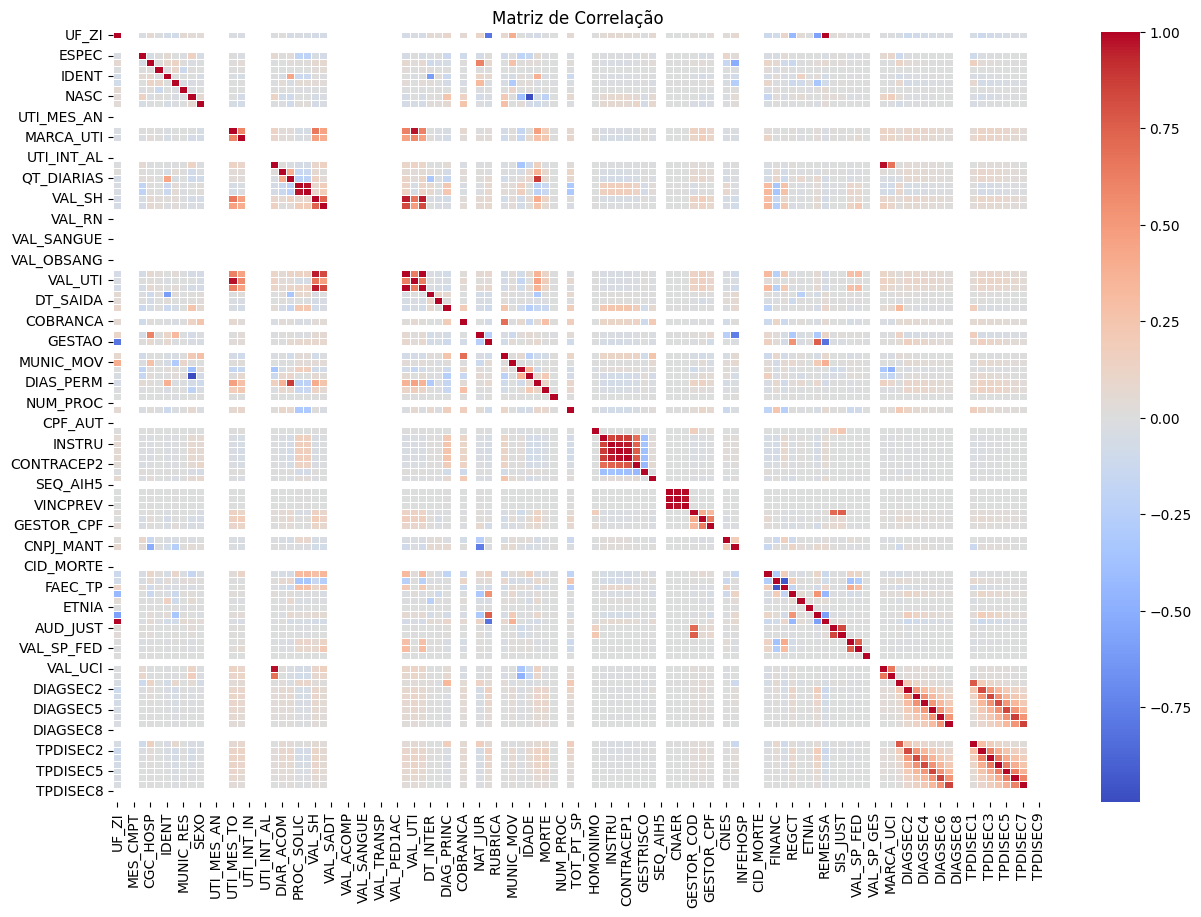

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

Como não foi possível verificar a feature VAL_TOT foi plotado esse gráfico que foca especialemnte na correlação de todas as features com VAL_TOT

<ipython-input-8-932f2bdb5a03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val_tot_corr.values, y=val_tot_corr.index, palette='coolwarm')


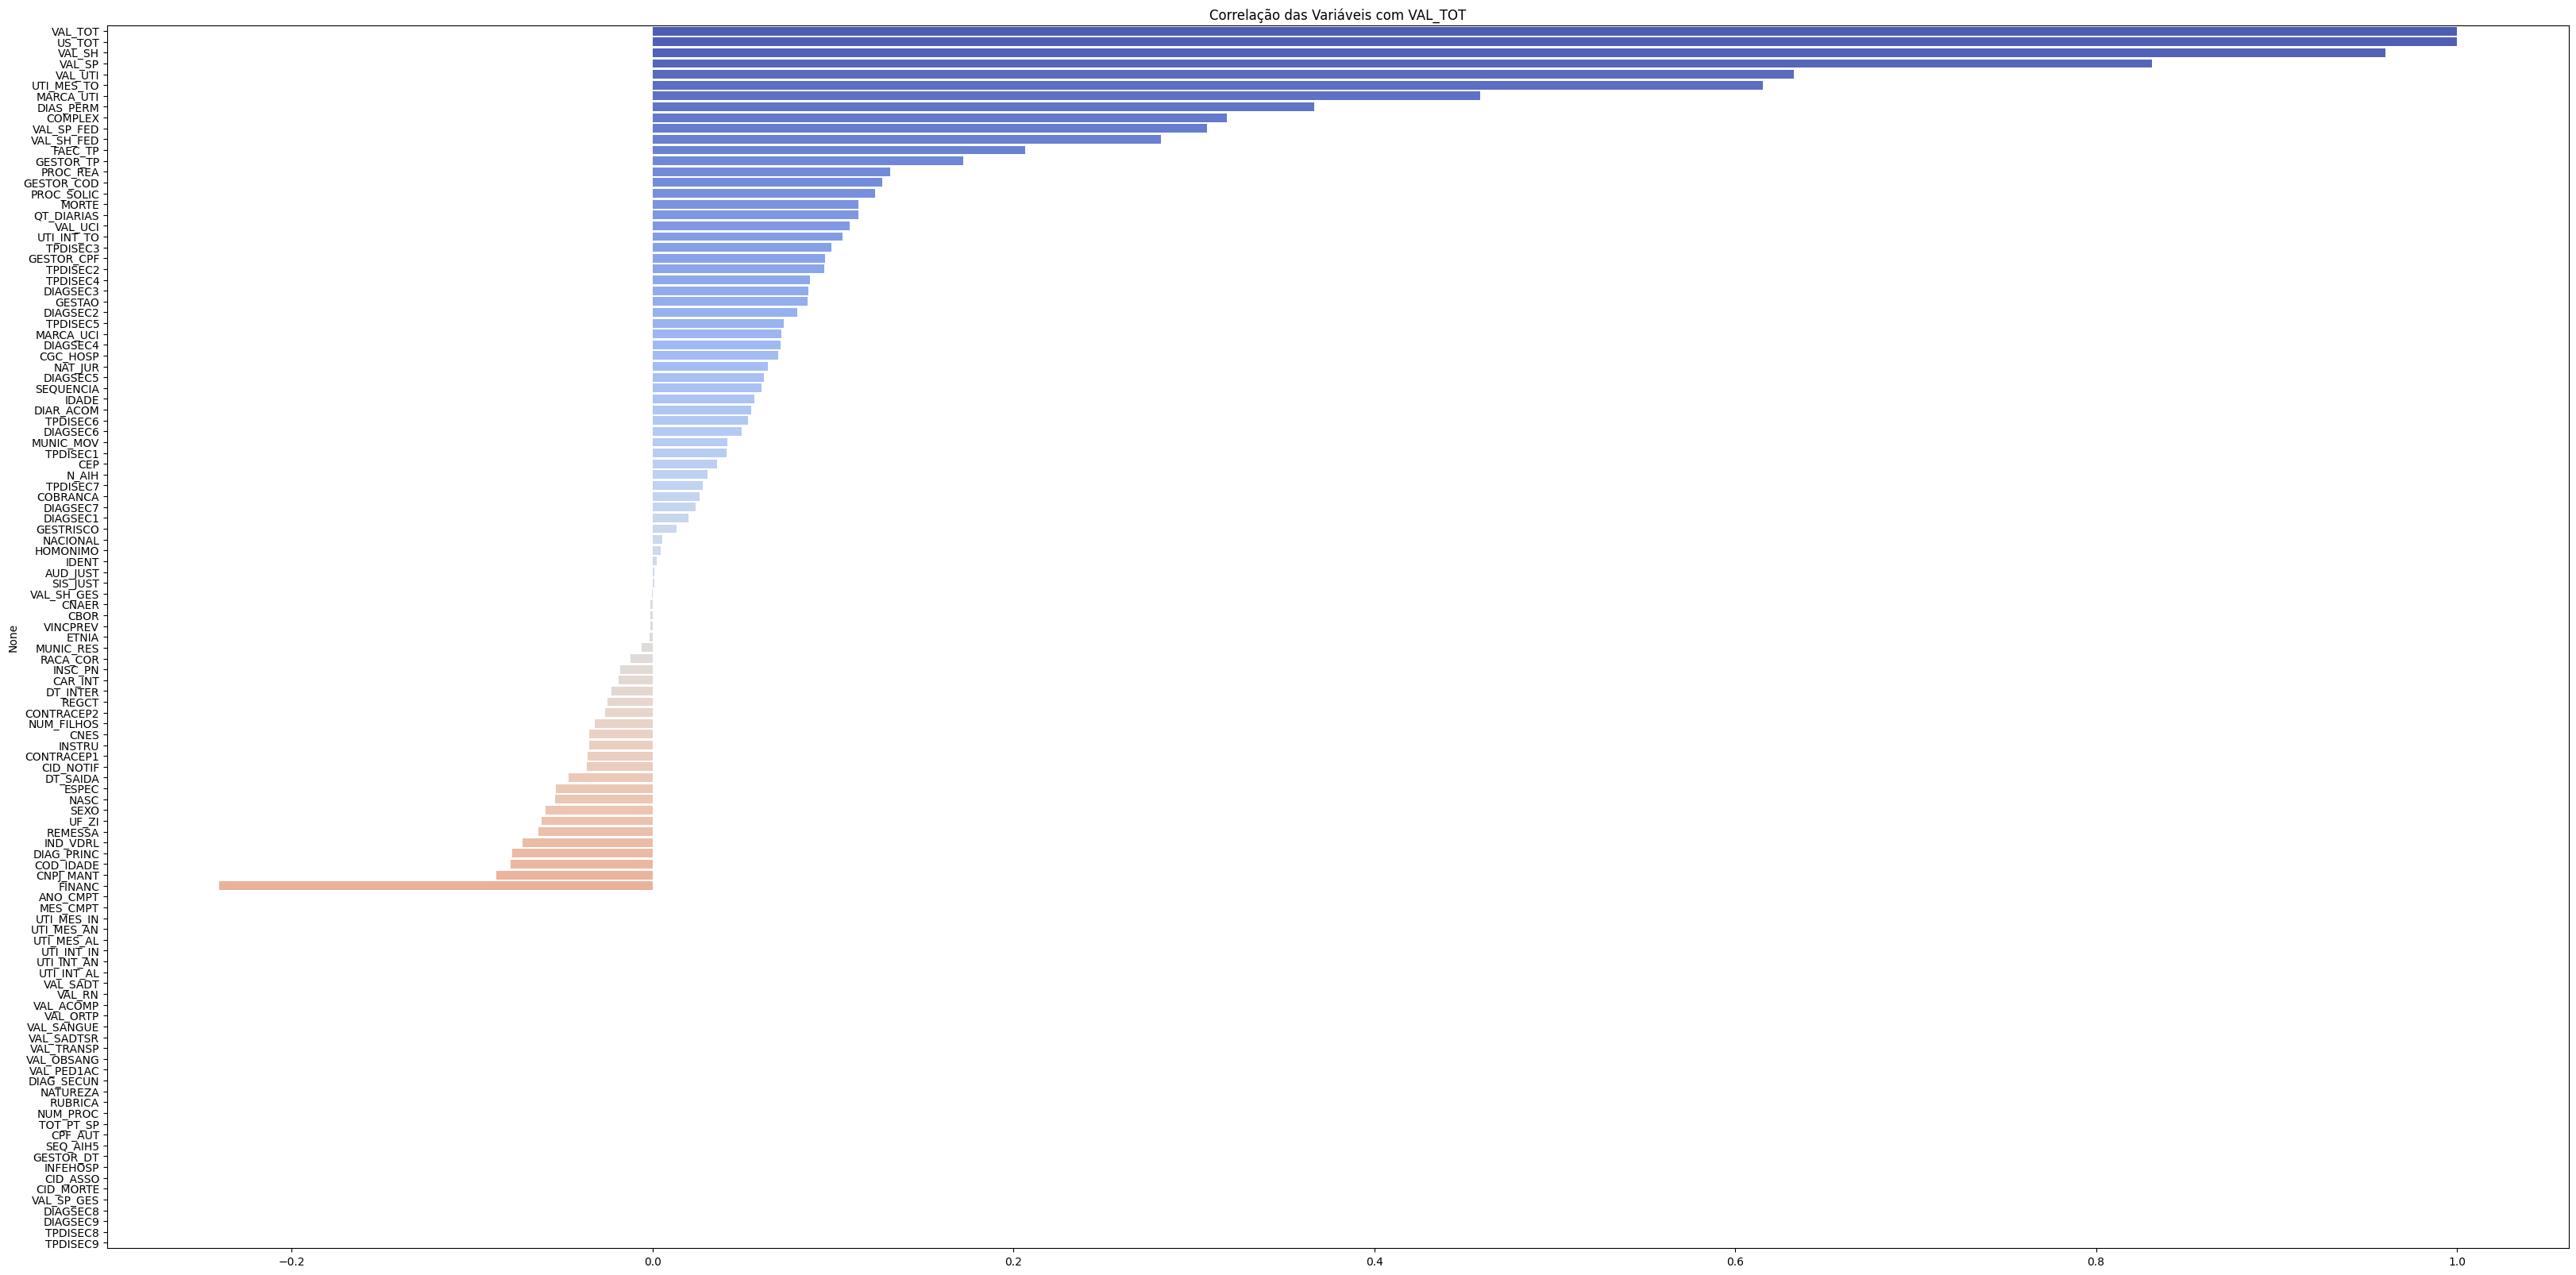

In [ ]:
plt.figure(figsize=(40, 20))
val_tot_corr = correlation_matrix['VAL_TOT'].sort_values(ascending=False)
sns.barplot(x=val_tot_corr.values, y=val_tot_corr.index, palette='coolwarm')
plt.title('Correlação das Variáveis com VAL_TOT')
plt.show()

In [ ]:
df.head()

UF_ZI  ANO_CMPT  MES_CMPT  ESPEC  CGC_HOSP          N_AIH  IDENT  \
0  352230      2024         3      3       446  3524115831412      1   
1  352230      2024         3      3       446  3524105805759      1   
2  352230      2024         3      3       446  3524105805760      1   
3  352230      2024         3      3       446  3524105805770      1   
4  352230      2024         3      3       446  3524105805781      1   

        CEP  MUNIC_RES      NASC  SEXO  UTI_MES_IN  UTI_MES_AN  UTI_MES_AL  \
0  18200001     352230  19480808     3           0           0           0   
1  18200001     352230  19900210     1           0           0           0   
2  18200001     352230  19610927     1           0           0           0   
3  18250000     351850  20041022     3           0           0           0   
4  18250000     351850  19370328     3           0           0           0   

   UTI_MES_TO  MARCA_UTI  UTI_INT_IN  UTI_INT_AN  UTI_INT_AL  UTI_INT_TO  \
0           0          0           0           0           0           0   
1           0          0           0           0           0           0   
2           0          0           0           0           0           0   
3           0          0           0           0           0           0   
4           0          0           0           0           0           0   

   DIAR_ACOM  QT_DIARIAS  PROC_SOLIC   PROC_REA   VAL_SH  VAL_SP  VAL_SADT  \
0          8           9   303060212  303060212  1050.05   40.17       0.0   
1          0           5   303140151  303140151   640.48   78.35       0.0   
2         14          15   303010037  303010037  1192.42   83.83       0.0   
3          0           5   303070129  303070129   266.38   41.95       0.0   
4          2           3   301060088  301060088   326.60   10.88       0.0   

   VAL_RN  VAL_ACOMP  VAL_ORTP  VAL_SANGUE  VAL_SADTSR  VAL_TRANSP  \
0     0.0        0.0       0.0         0.0         0.0         0.0   
1     0.0        0.0       0.0         0.0         0.0         0.0   
2     0.0        0.0       0.0         0.0         0.0         0.0   
3     0.0        0.0       0.0         0.0         0.0         0.0   
4     0.0        0.0       0.0         0.0         0.0         0.0   

   VAL_OBSANG  VAL_PED1AC  VAL_TOT  VAL_UTI  US_TOT  DT_INTER  DT_SAIDA  \
0         0.0         0.0  1090.22      0.0  210.87  20240321  20240329   
1         0.0         0.0   718.83      0.0  139.03  20240304  20240309   
2         0.0         0.0  1276.25      0.0  246.85  20240219  20240305   
3         0.0         0.0   308.33      0.0   59.63  20240303  20240307   
4         0.0         0.0   337.48      0.0   65.27  20240229  20240303   

   DIAG_PRINC  DIAG_SECUN  COBRANCA  NATUREZA  NAT_JUR  GESTAO  RUBRICA  \
0        2128           0        41         0     3999       1        0   
1        2356           0        12         0     3999       1        0   
2         103           0        12         0     3999       1        0   
3        2822           0        31         0     3999       1        0   
4        4582           0        12         0     3999       1        0   

   IND_VDRL  MUNIC_MOV  COD_IDADE  IDADE  DIAS_PERM  MORTE  NACIONAL  \
0         0     352230          4     75          8      1        10   
1         0     352230          4     34          5      0        10   
2         0     352230          4     62         15      0        10   
3         0     352230          4     19          4      0        10   
4         0     352230          4     86          3      0        10   

   NUM_PROC  CAR_INT  TOT_PT_SP  CPF_AUT  HOMONIMO  NUM_FILHOS  INSTRU  \
0         0        2          0        0         0           0       0   
1         0        2          0        0         0           0       0   
2         0        2          0        0         0           0       0   
3         0        2          0        0         0           0       0   
4         0        2          0        0         0

Do dataset global, foi dividido em features de internação e dos pacientes para análise.

In [ ]:
features_internacao_1 = ['UTI_MES_TO','MARCA_UTI', 'UTI_INT_TO', 'DIAR_ACOM', 'QT_DIARIAS', 'PROC_SOLIC', 'PROC_REA', 'DT_INTER', 'DT_SAIDA', 'DIAG_PRINC', 'IND_VDRL',]
features_internacao_2 = ['DIAS_PERM',  'CAR_INT', 'CID_NOTIF', 'CONTRACEP1', 'CONTRACEP2', 'GESTRISCO', 'CNAER', 'CNES', 'CID_ASSO', 'UF_ZI', 'CEP', 'MUNIC_RES']
features_paciente = ['NASC', 'SEXO', 'IDADE', 'MORTE', 'NACIONAL', 'NUM_FILHOS', 'INSTRU', 'RACA_COR', 'ETNIA' ]
target = ['VAL_TOT']

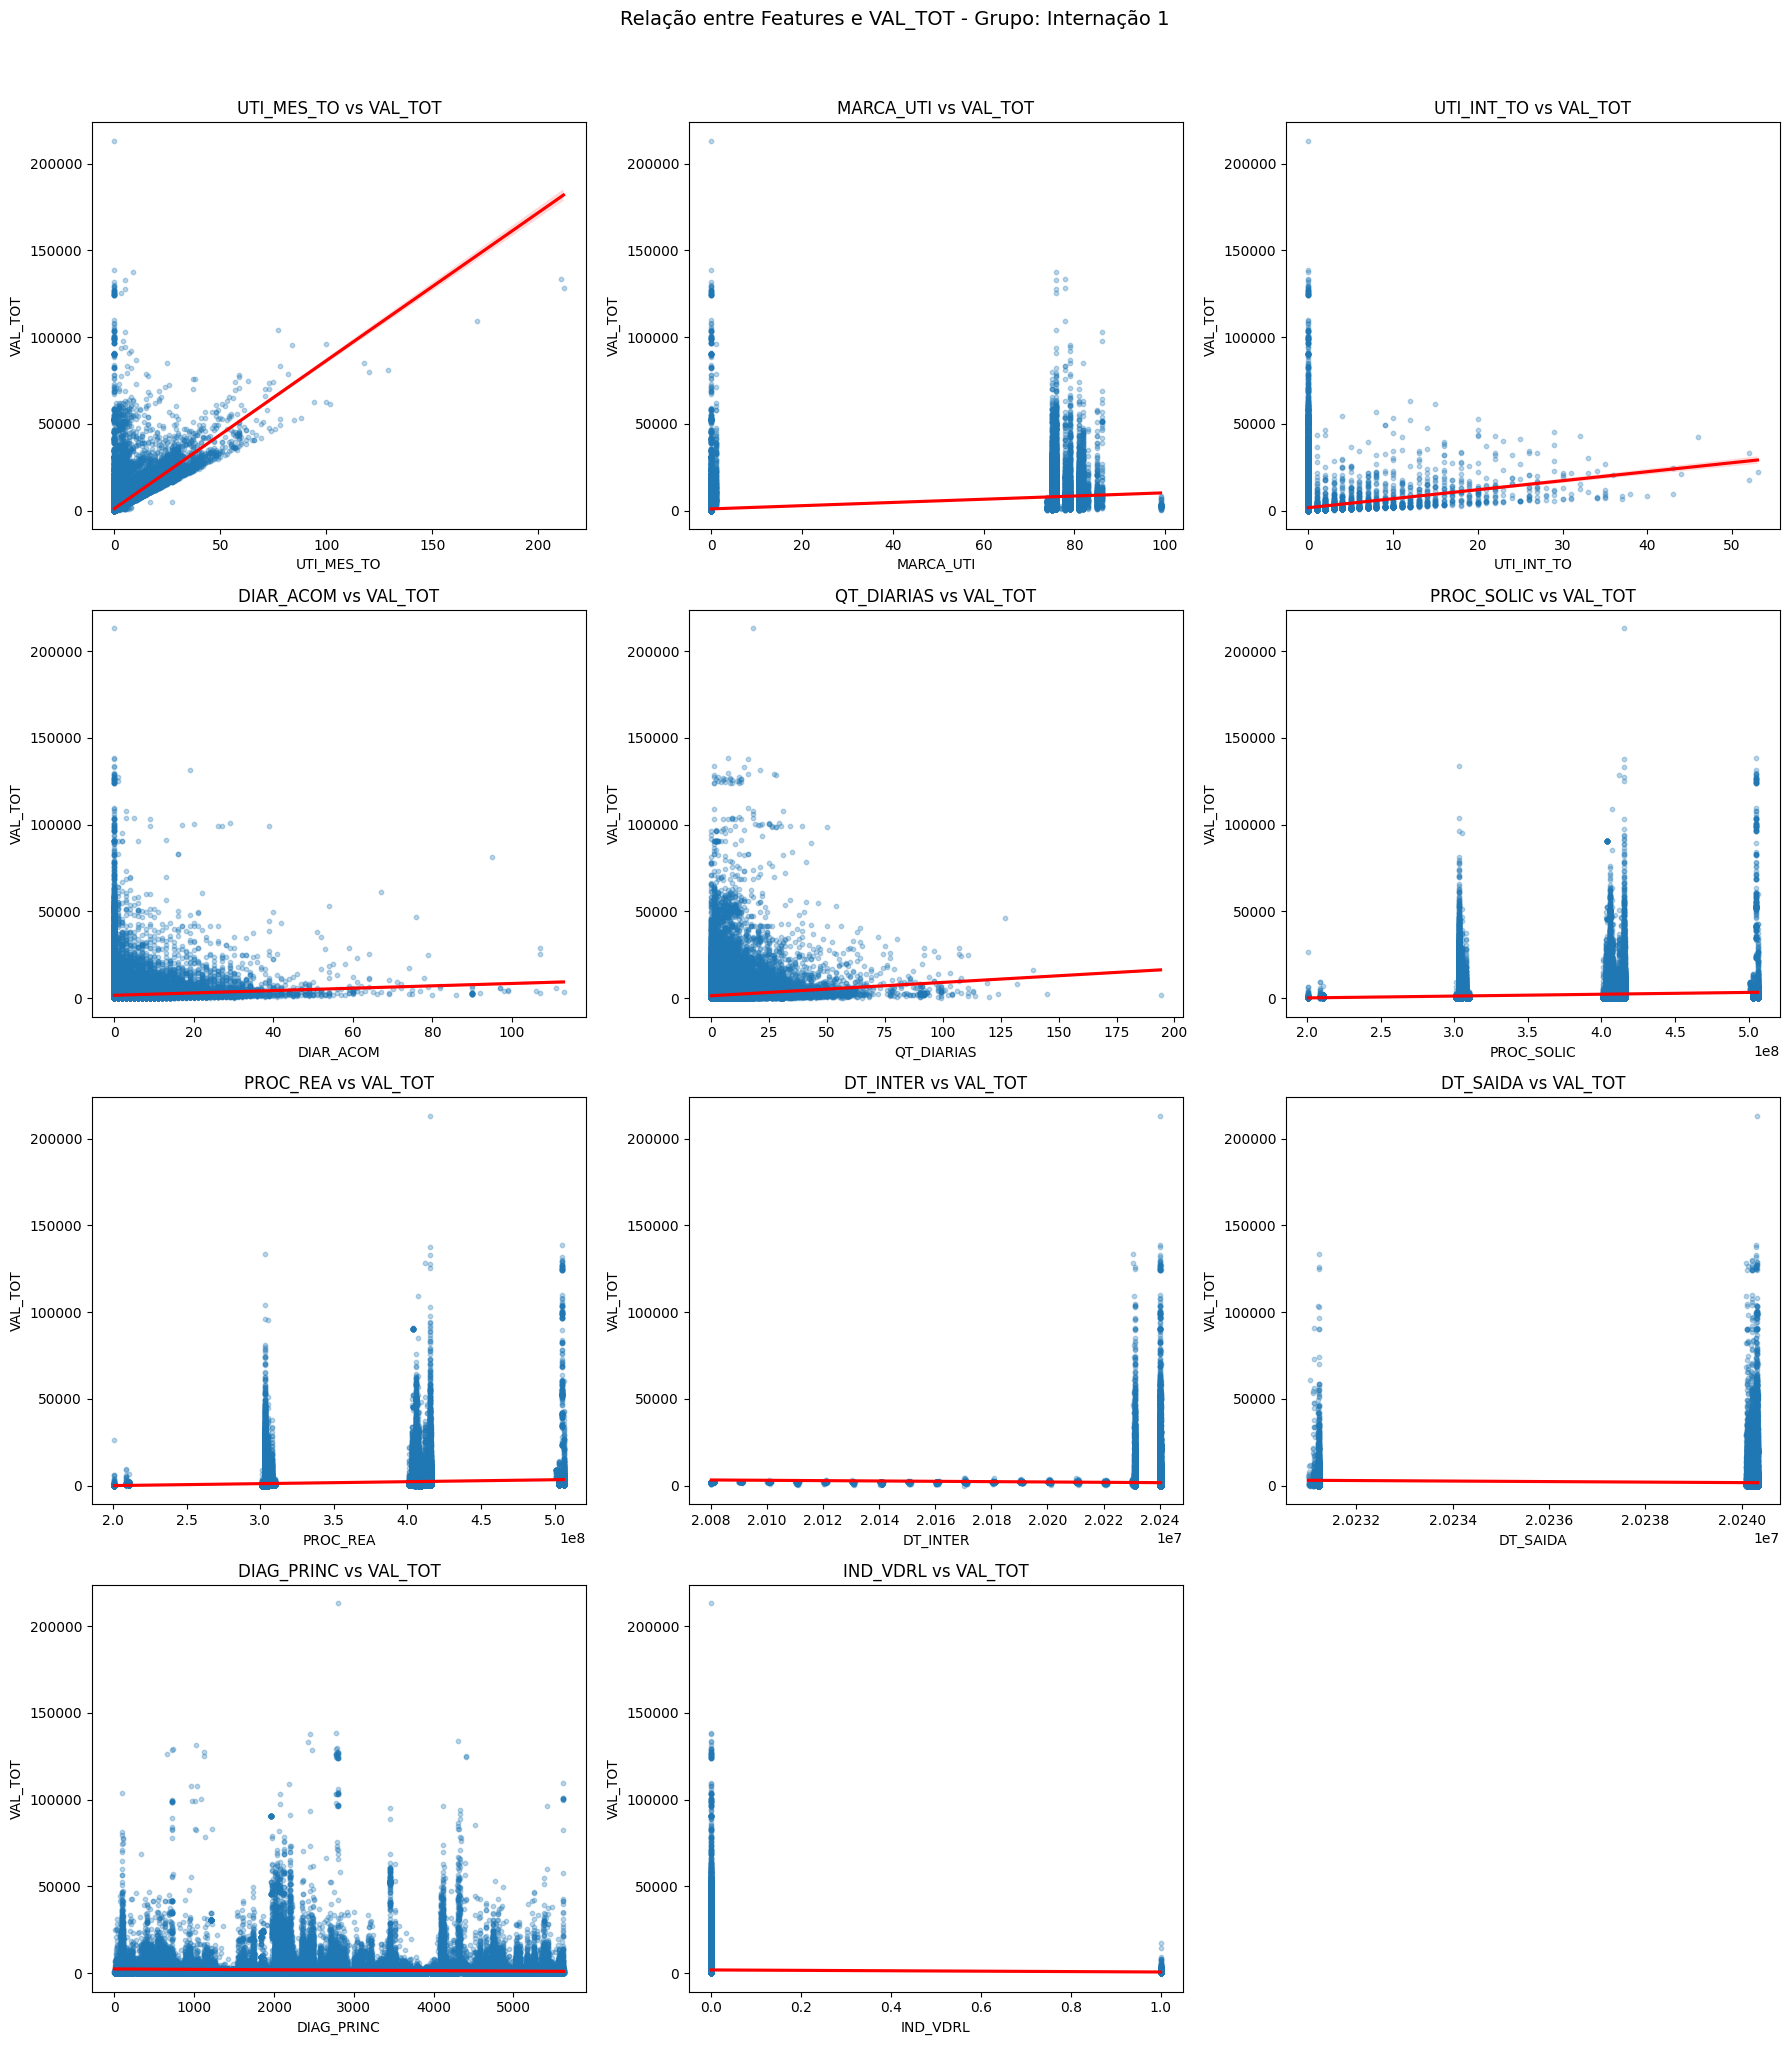

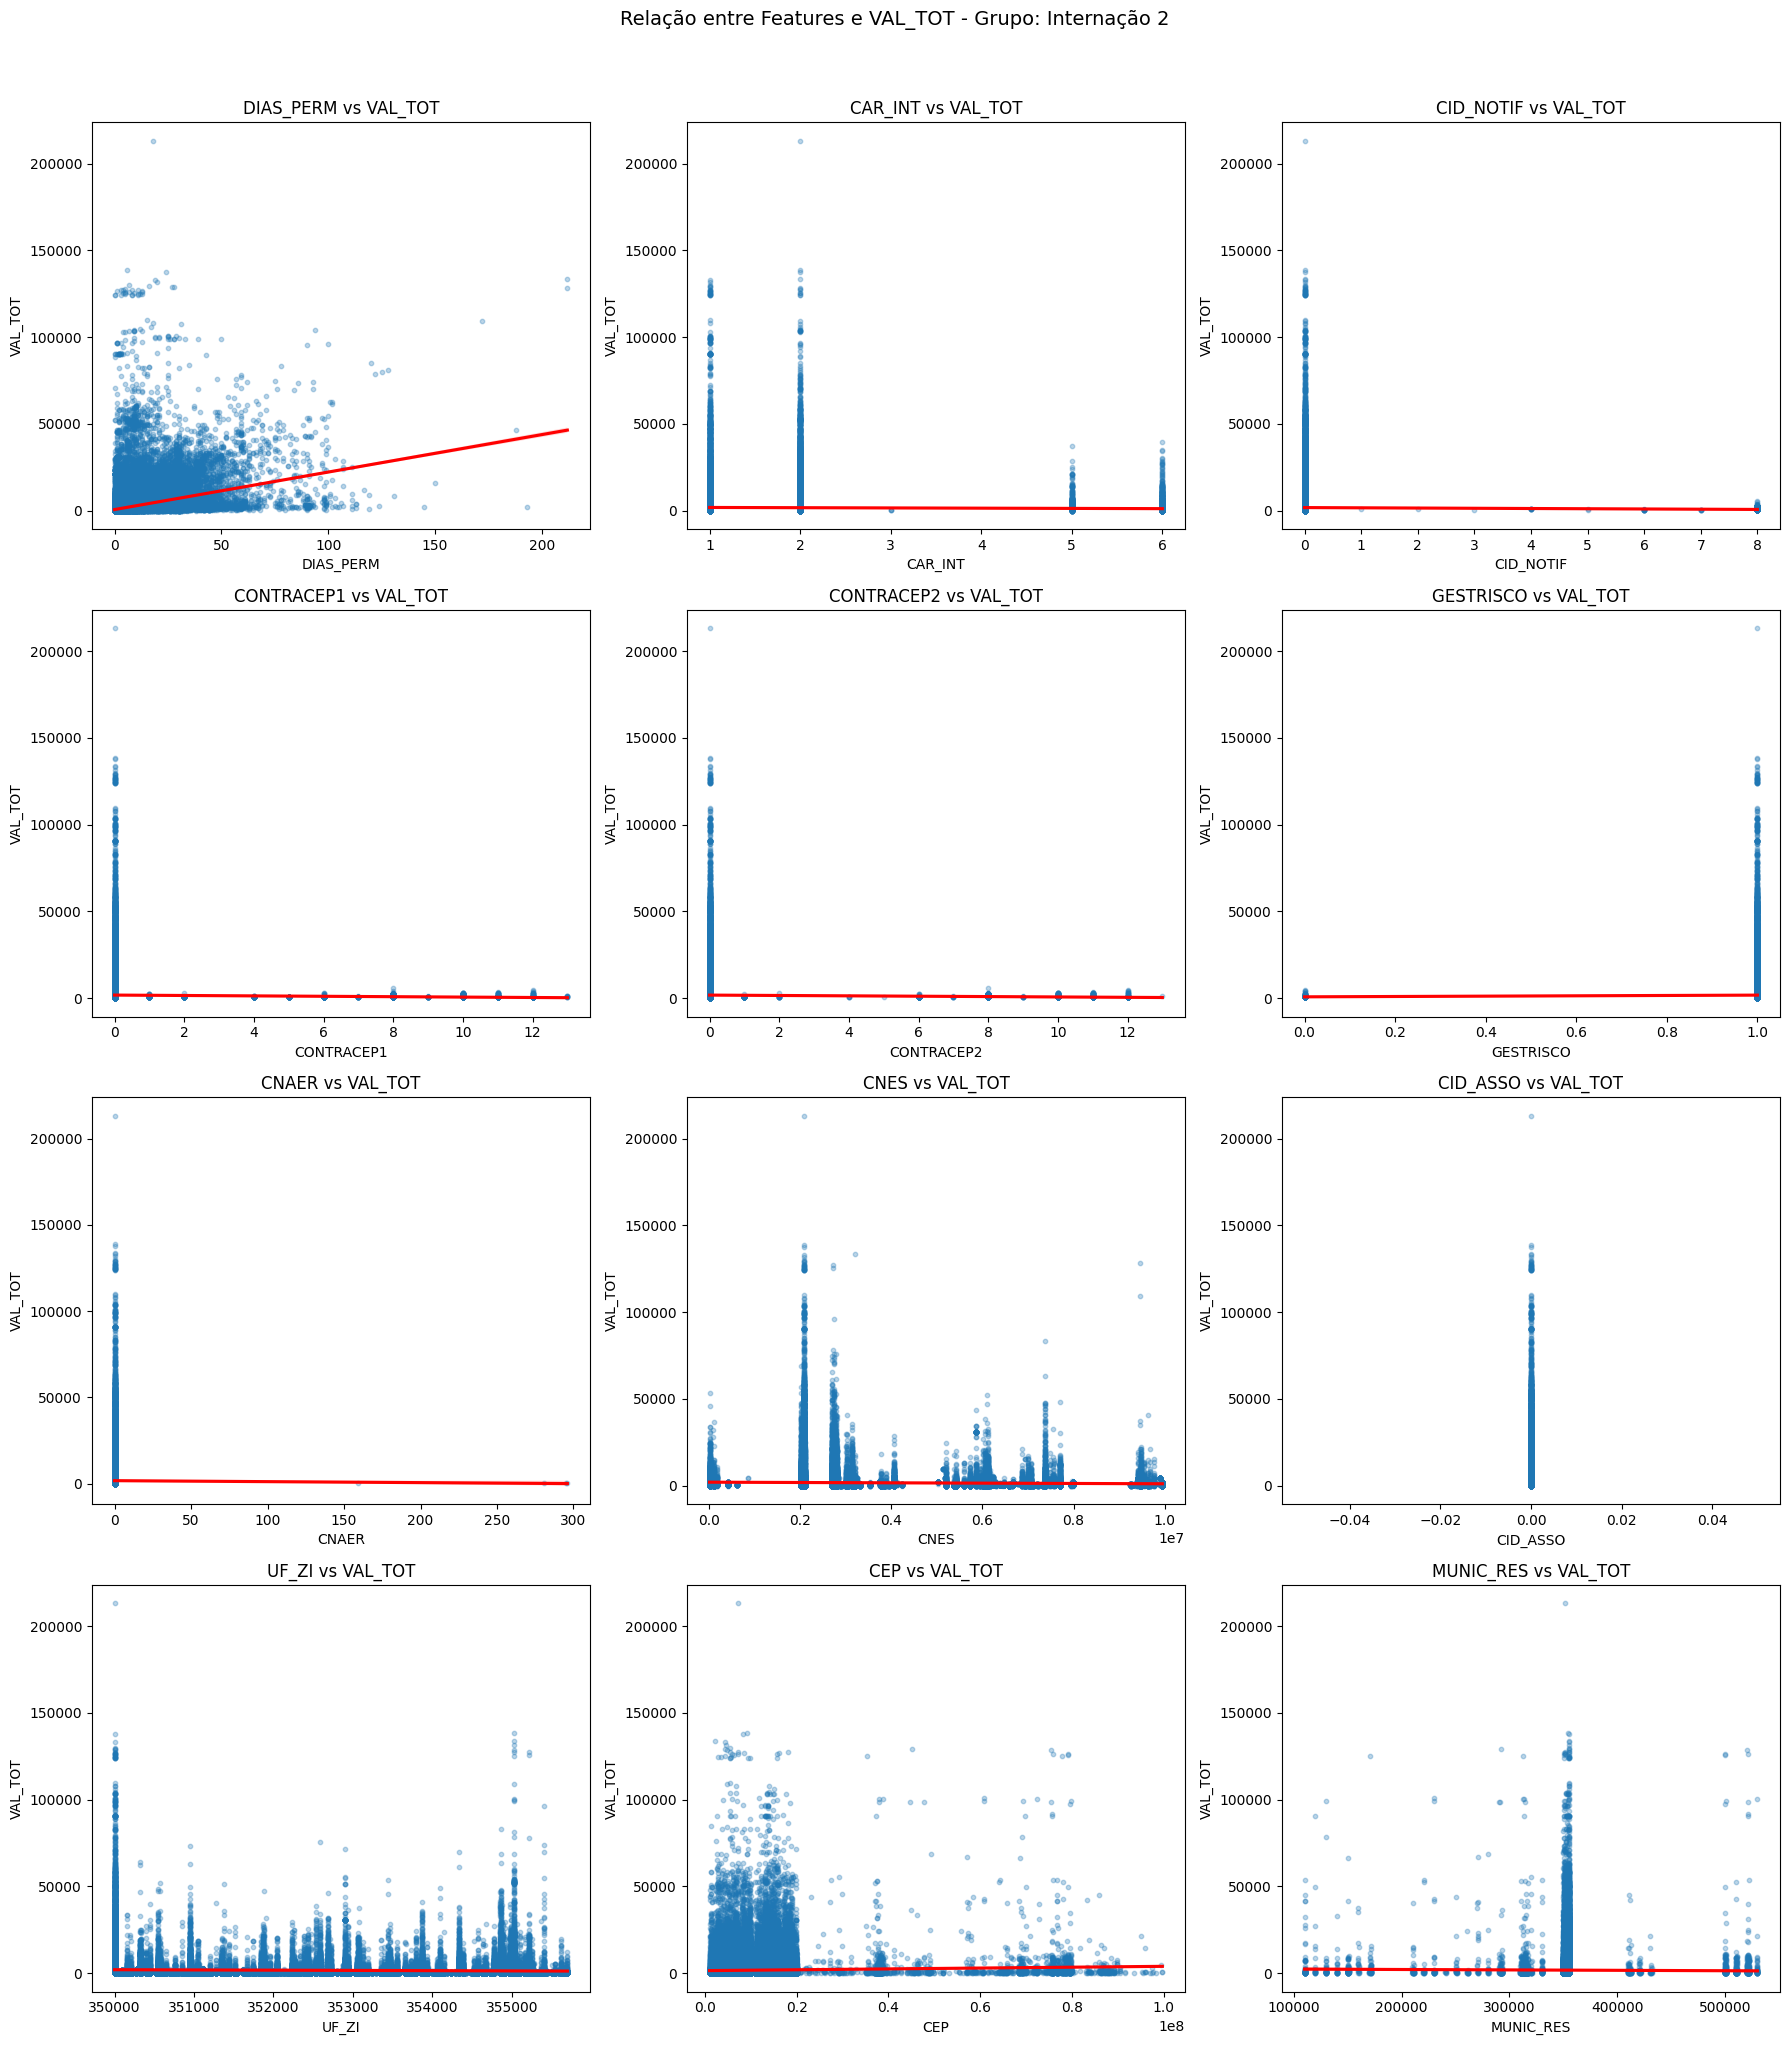

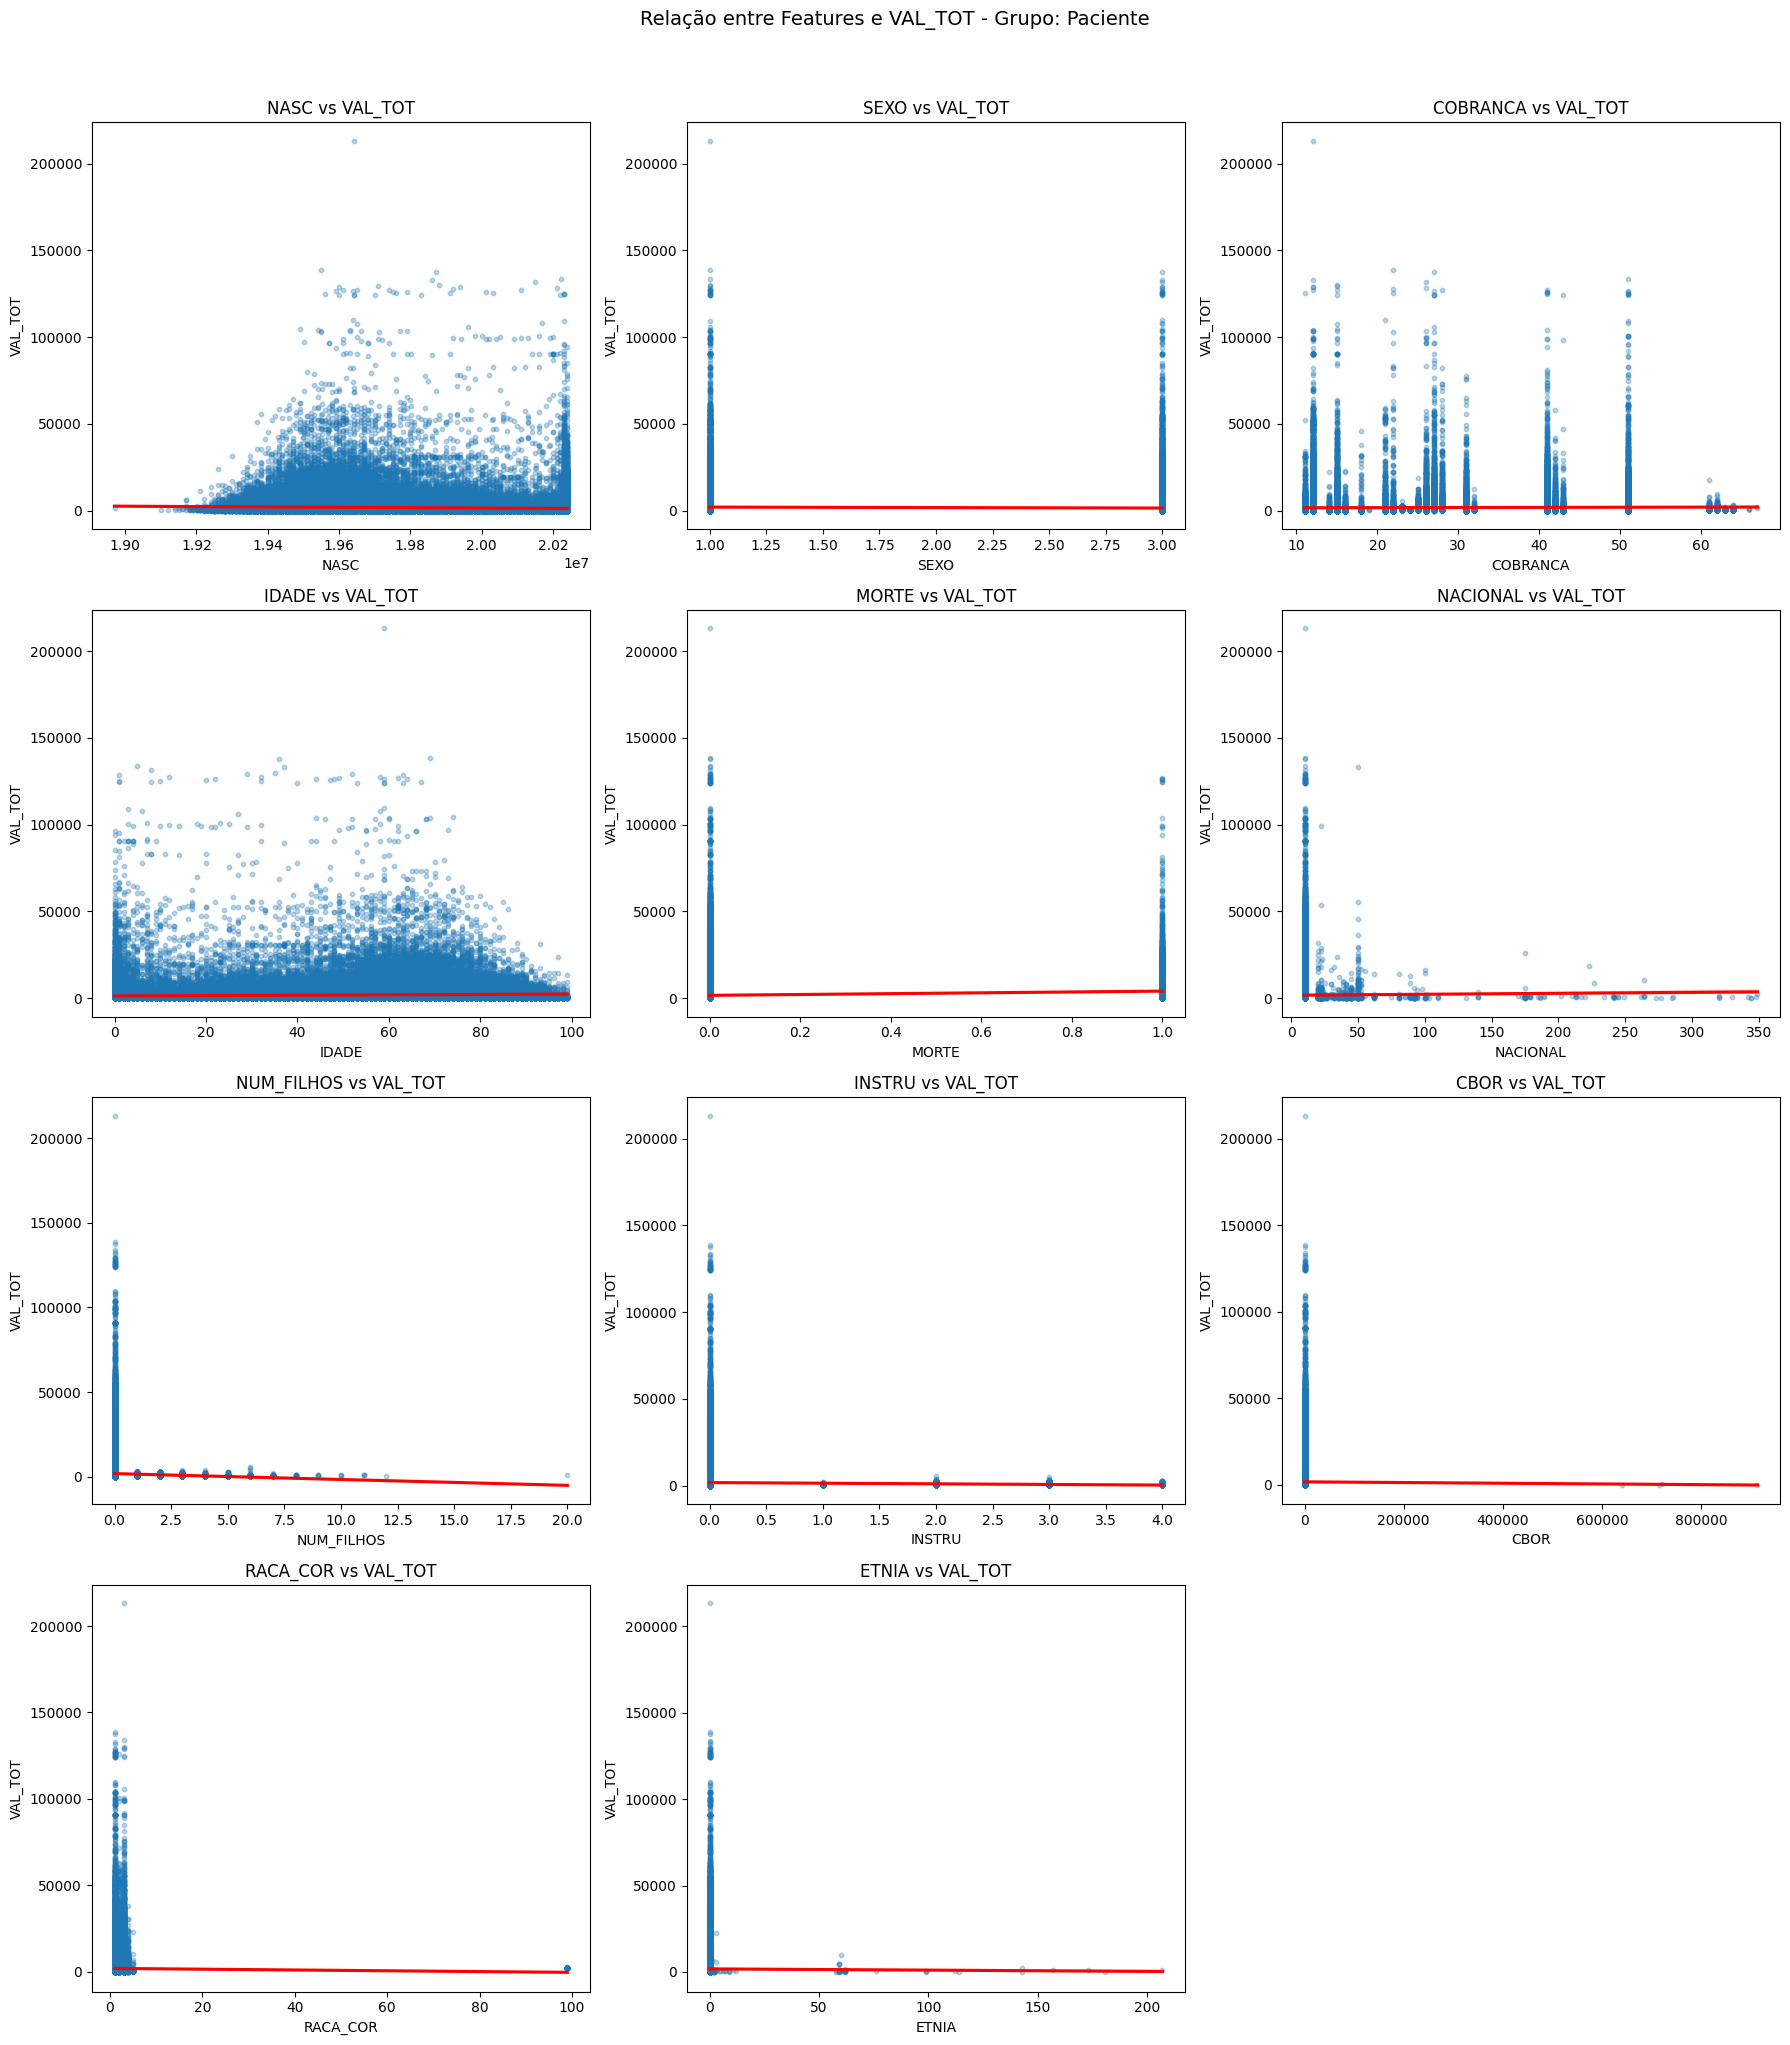

In [ ]:
grupos_features = {
    'Internação 1': features_internacao_1,
    'Internação 2': features_internacao_2,
    'Paciente': features_paciente
}

for nome, features in grupos_features.items():
    n_features = len(features)
    if n_features == 0:
        continue

    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols

    plt.figure(figsize=(18, 5*n_rows))
    plt.suptitle(f'Relação entre Features e VAL_TOT - Grupo: {nome}', y=1.02, fontsize=14)

    for i, feature in enumerate(features, 1):
        if pd.api.types.is_numeric_dtype(df[feature]):
            plt.subplot(n_rows, n_cols, i)
            sns.regplot(x=feature, y='VAL_TOT', data=df,
                        scatter_kws={'alpha':0.3, 's':10},
                        line_kws={'color':'red'})
            plt.title(f'{feature} vs VAL_TOT')
        else:
            print(f"Skipping {feature} as it's not numeric.")

    plt.tight_layout()
    plt.show()

###Verifica a existencia de dados nulos e info do dataset

In [ ]:
df.isnull().sum().to_frame().T

UF_ZI  ANO_CMPT  MES_CMPT  ESPEC  CGC_HOSP  N_AIH  IDENT  CEP  MUNIC_RES  \
0      0         0         0      0         0      0      0    0          0   

   NASC  SEXO  UTI_MES_IN  UTI_MES_AN  UTI_MES_AL  UTI_MES_TO  MARCA_UTI  \
0     0     0           0           0           0           0          0   

   UTI_INT_IN  UTI_INT_AN  UTI_INT_AL  UTI_INT_TO  DIAR_ACOM  QT_DIARIAS  \
0           0           0           0           0          0           0   

   PROC_SOLIC  PROC_REA  VAL_SH  VAL_SP  VAL_SADT  VAL_RN  VAL_ACOMP  \
0           0         0       0       0         0       0          0   

   VAL_ORTP  VAL_SANGUE  VAL_SADTSR  VAL_TRANSP  VAL_OBSANG  VAL_PED1AC  \
0         0           0           0           0           0           0   

   VAL_TOT  VAL_UTI  US_TOT  DT_INTER  DT_SAIDA  DIAG_PRINC  DIAG_SECUN  \
0        0        0       0         0         0           0           0   

   COBRANCA  NATUREZA  NAT_JUR  GESTAO  RUBRICA  IND_VDRL  MUNIC_MOV  \
0         0         0        0       0        0         0          0   

   COD_IDADE  IDADE  DIAS_PERM  MORTE  NACIONAL  NUM_PROC  CAR_INT  TOT_PT_SP  \
0          0      0          0      0         0         0        0          0   

   CPF_AUT  HOMONIMO  NUM_FILHOS  INSTRU  CID_NOTIF  CONTRACEP1  CONTRACEP2  \
0        0         0           0       0          0           0           0   

   GESTRISCO  INSC_PN  SEQ_AIH5  CBOR  CNAER  VINCPREV  GESTOR_COD  GESTOR_TP  \
0          0        0         0     0      0         0           0          0   

   GESTOR_CPF  GESTOR_DT  CNES  CNPJ_MANT  INFEHOSP  CID_ASSO  CID_MORTE  \
0           0          0     0          0         0         0          0   

   COMPLEX  FINANC  FAEC_TP  REGCT  RACA_COR  ETNIA  SEQUENCIA  REMESSA  \
0        0       0        0      0         0      0          0        0   

   AUD_JUST  SIS_JUST  VAL_SH_FED  VAL_SP_FED  VAL_SH_GES  VAL_SP_GES  \
0         0         0           0           0           0           0   

   VAL_UCI  MARCA_UCI  DIAGSEC1  DIAGSEC2  DIAGSEC3  DIAGSEC4  DIAGSEC5  \
0        0          0         0         0         0         0         0   

   DIAGSEC6  DIAGSEC7  DIAGSEC8  DIAGSEC9  TPDISEC1  TPDISEC2  TPDISEC3  \
0         0         0         0         0         0         0         0   

   TPDISEC4  TPDISEC5  TPDISEC6  TPDISEC7  TPDISEC8  TPDISEC9  
0         0         0         0         0         0         0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241806 entries, 0 to 241805
Columns: 113 entries, UF_ZI to TPDISEC9
dtypes: float64(19), int64(94)
memory usage: 208.5 MB


##PCA de todas as features



####Padronização de dados

Remove a coluna target para a relização da padronização

In [ ]:
df_x = df.drop('VAL_TOT', axis=1)
df_y = df['VAL_TOT']

Remove todas as colunas correspondente a valor porque elas tem forte relação e pode enviesar o PCA

<div align="center">

Variável | Descrição
--- | ---
VAL_SH | Valor de serviços hospitalares  
VAL_SP | Valor de serviços profissionais  
VAL_SADT | Zerado  
VAL_RN | Zerado  
VAL_ACOMP | Zerado  
VAL_ORTP | Zerado  
VAL_SANGUE | Zerado  
VAL_SADTSR | Zerado  
VAL_TRANSP | Zerado  
VAL_OBSANG | Zerado  
VAL_PED1AC | Zerado  
VAL_UTI | Valor de UTI  
US_TOT | Valor total, em dólar  

In [ ]:
to_remove_val = [
    'VAL_SH', 'VAL_SP', 'VAL_SADT', 'VAL_RN', 'VAL_ACOMP',
    'VAL_ORTP', 'VAL_SANGUE', 'VAL_SADTSR', 'VAL_TRANSP', 'VAL_OBSANG',
    'VAL_PED1AC', 'VAL_UTI', 'US_TOT']

df_x = df.drop(columns=[col for col in to_remove_val if col in df.columns])
df_x.shape

(241806, 100)

A padronização de dados é importante para o PCA, porque ele é sensível à escala dos dados, e caso não seja feita o PCA pode ser enviesado.

pca.explained_variance_ratio_: Retorna a porcentagem da variância explicada por cada componente principal.

np.cumsum(...): Soma acumulada da variância explicada → mostra, por exemplo, quanto da variância total é explicada pelos 2 primeiros componentes, pelos 3 primeiros, etc.

Plota um gráfico de linha mostrando quantidade de variância explicada em função do número de componentes principais usados.

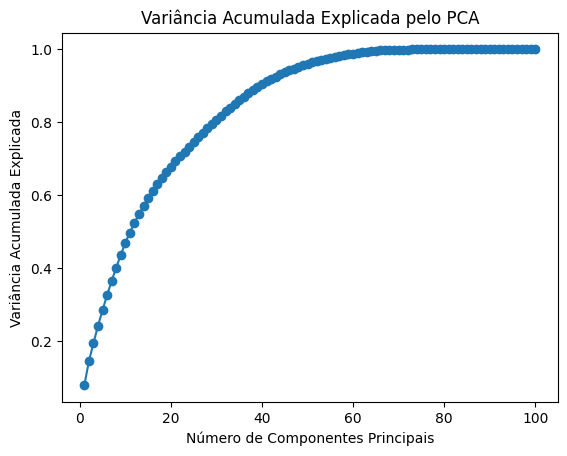

In [ ]:
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_x)

pca = PCA()
pca.fit(df_standardized)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Acumulada Explicada')
plt.title('Variância Acumulada Explicada pelo PCA')
plt.show()

Vamos definir uma porcentagem de **80%** de explicancia sobre os dados

np.argmax(...) retorna o índice do primeiro True, ou seja, o primeiro componente que faz a variância acumulada ultrapassar ou atingir o limiar desejado.

In [ ]:
variance_threshold = 0.80

pca_number = np.argmax(cumulative_variance >= variance_threshold) + 1

print(f"Número de Componentes para {variance_threshold * 100}% da Variância: {pca_number}")

Número de Componentes para 80.0% da Variância: 30


####PCA

Aplica o PCA com o número calculado anteriormente e mostra a variancia para cada componente

In [ ]:
pca = PCA(n_components=pca_number)
main_components = pca.fit_transform(df_standardized)
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Variância explicada de cada componente:\n {explained_variance_ratio}")

Variância explicada de cada componente:
 [0.07834563 0.06594032 0.04989844 0.04743103 0.04337979 0.04097177
 0.03909831 0.03625503 0.0348862  0.03333492 0.02820785 0.02668897
 0.0233402  0.02263999 0.02131062 0.0209835  0.01863818 0.01657985
 0.01623088 0.01461057 0.01438252 0.01344684 0.01317436 0.01315604
 0.01313818 0.01272905 0.01241205 0.01217301 0.01187578 0.01176663]


Cria a nomenclatura das colunas e salva em um DataFrame pca_df

In [ ]:
components_num = main_components.shape[1]
column_names = [f'PC{i}' for i in range(1, components_num + 1)]
pca_df = pd.DataFrame(data=main_components, columns=column_names)
pca_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.192488 -1.076040 -1.934643 -0.423793  0.202887 -2.878996 -0.080209   
1 -0.595856 -0.912544 -1.645265 -0.169653 -0.185126 -0.842035  0.062774   
2  0.146616 -1.678878 -1.702598 -0.305026  0.725916 -2.617055 -0.163003   
3 -0.738009 -0.517879 -1.960851  0.249455 -0.469075 -0.472234  0.101722   
4 -0.188705 -0.926529 -2.127271 -1.143416  1.342924 -2.499368  0.069091   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.170067 -1.097565 -0.081765 -0.932698  0.649471 -1.722087 -0.838502   
1  0.268433 -1.175554 -1.372586 -0.508456 -1.016358 -0.818645  0.819498   
2 -1.455951 -0.844899 -0.652656 -0.910486 -0.777349 -0.808758  0.499911   
3  0.726772 -1.315073 -1.409494  0.514668 -0.672589 -1.260209  0.345395   
4  1.796617  0.455491 -1.140639 -2.315452  1.420764  0.480612  1.448366   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0 -1.565211  1.286974 -0.609462  0.489636  0.183312  1.171198 -1.297556   
1  0.601790  0.106422 -0.397317 -0.070968  0.128469 -0.018499 -0.130403   
2 -0.484778  0.367625  0.071888  1.825873  2.193540 -0.194307 -0.173677   
3  0.290130 -0.053234 -0.196850  0.092465 -0.005109  0.132009 -0.374300   
4  0.120501 -1.073525  5.458494 -0.712556 -1.383551  1.106437 -1.266518   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0 -0.297431  0.331279  0.002578  0.012943 -0.775916 -0.174480 -1.015797   
1  0.212830 -0.084289 -0.005100 -0.049638  0.381785  0.060961  0.522146   
2 -0.080931  0.160084 -0.061266  0.042616  0.266659  0.049655 -0.100197   
3  0.416570 -0.035509 -0.031628 -0.087355  0.186047  0.032624 -0.490193   
4  1.141872 -0.189947 -0.000966 -0.263245  0.252657  0.607934 -0.377966   

       PC29      PC30  
0 -0.808669  0.314129  
1 -0.186637 -0.182104  
2 -0.583210  0.769001  
3  0.611970 -0.223532  
4  0.568074 -0.210834

Colocando a coluna target 'VAL_TOT' no final do dataframe

In [ ]:
pca_df = pd.concat([pca_df, df_y], axis=1)
pca_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.192488 -1.076040 -1.934643 -0.423793  0.202887 -2.878996 -0.080209   
1 -0.595856 -0.912544 -1.645265 -0.169653 -0.185126 -0.842035  0.062774   
2  0.146616 -1.678878 -1.702598 -0.305026  0.725916 -2.617055 -0.163003   
3 -0.738009 -0.517879 -1.960851  0.249455 -0.469075 -0.472234  0.101722   
4 -0.188705 -0.926529 -2.127271 -1.143416  1.342924 -2.499368  0.069091   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.170067 -1.097565 -0.081765 -0.932698  0.649471 -1.722087 -0.838502   
1  0.268433 -1.175554 -1.372586 -0.508456 -1.016358 -0.818645  0.819498   
2 -1.455951 -0.844899 -0.652656 -0.910486 -0.777349 -0.808758  0.499911   
3  0.726772 -1.315073 -1.409494  0.514668 -0.672589 -1.260209  0.345395   
4  1.796617  0.455491 -1.140639 -2.315452  1.420764  0.480612  1.448366   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0 -1.565211  1.286974 -0.609462  0.489636  0.183312  1.171198 -1.297556   
1  0.601790  0.106422 -0.397317 -0.070968  0.128469 -0.018499 -0.130403   
2 -0.484778  0.367625  0.071888  1.825873  2.193540 -0.194307 -0.173677   
3  0.290130 -0.053234 -0.196850  0.092465 -0.005109  0.132009 -0.374300   
4  0.120501 -1.073525  5.458494 -0.712556 -1.383551  1.106437 -1.266518   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0 -0.297431  0.331279  0.002578  0.012943 -0.775916 -0.174480 -1.015797   
1  0.212830 -0.084289 -0.005100 -0.049638  0.381785  0.060961  0.522146   
2 -0.080931  0.160084 -0.061266  0.042616  0.266659  0.049655 -0.100197   
3  0.416570 -0.035509 -0.031628 -0.087355  0.186047  0.032624 -0.490193   
4  1.141872 -0.189947 -0.000966 -0.263245  0.252657  0.607934 -0.377966   

       PC29      PC30  VAL_TOT  
0 -0.808669  0.314129  1090.22  
1 -0.186637 -0.182104   718.83  
2 -0.583210  0.769001  1276.25  
3  0.611970 -0.223532   308.33  
4  0.568074 -0.210834   337.48

####Gráficos do PCA

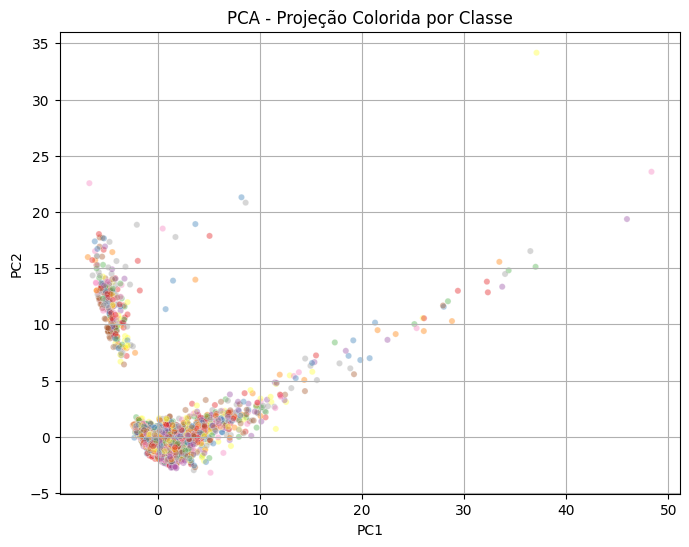

In [ ]:
sample_df = pca_df.sample(n=10000, random_state=42)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=sample_df, x='PC1', y='PC2', hue='VAL_TOT', palette='Set1', alpha=0.4, s=20, legend=False)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Projeção Colorida por Classe')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

**Conclusão do gráfico:**

Os valores da target estão muito misturadas no gráfico, podendo indicar alta
correlação entre classes ou features pouco informativas.

Alguns pontos indicando outliers


Plotar o PC1 vs. target pode mostrar se a projeção mantém informação relevante para a tarefa. A idéia dessa plotagem é, embora os PCAs sejam combinações lineares das features originais, observar sua relação com o target pode dar insights sobre quais features originais são mais importantes.

Segunda parte no código: Ajusta um polinômio de grau 1 (linha reta)

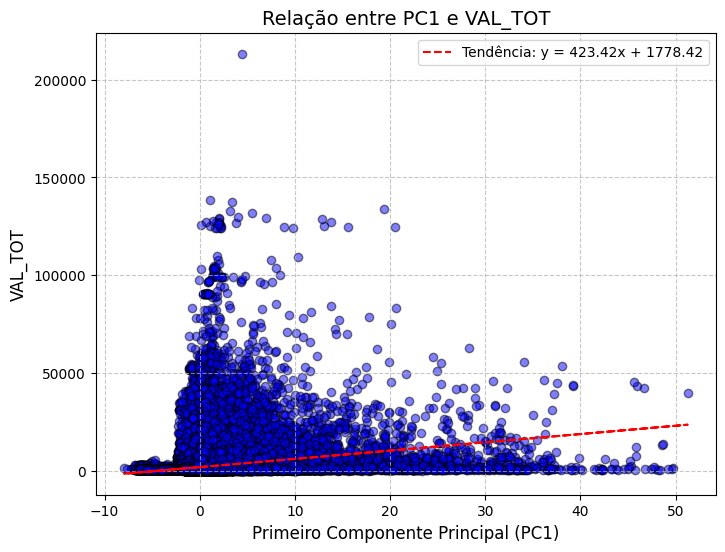

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x=pca_df['PC1'], y=df_y, alpha=0.5, color='blue', edgecolors='k')
plt.title("Relação entre PC1 e VAL_TOT", fontsize=14)
plt.xlabel("Primeiro Componente Principal (PC1)", fontsize=12)
plt.ylabel("VAL_TOT", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

z = np.polyfit(pca_df['PC1'], df_y, 1)
p = np.poly1d(z)
plt.plot(pca_df['PC1'], p(pca_df['PC1']), color='red', linestyle='--', label=f'Tendência: y = {z[0]:.2f}x + {z[1]:.2f}')
plt.legend()
plt.show()

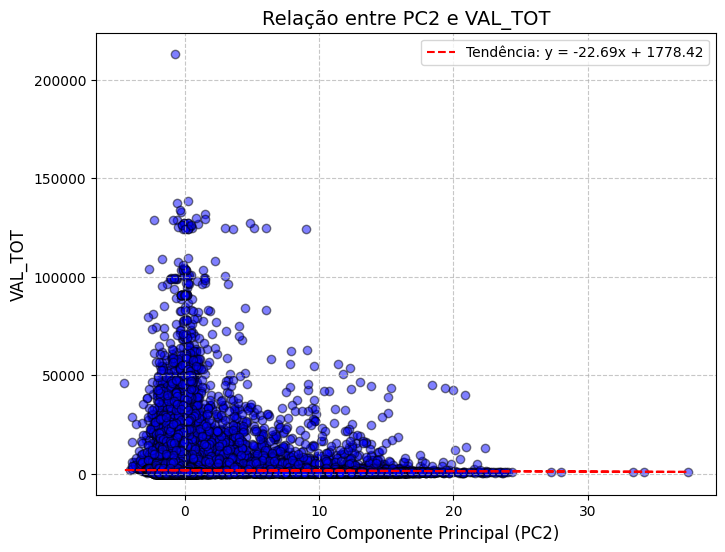

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x=pca_df['PC2'], y=df_y, alpha=0.5, color='blue', edgecolors='k')
plt.title("Relação entre PC2 e VAL_TOT", fontsize=14)
plt.xlabel("Primeiro Componente Principal (PC2)", fontsize=12)
plt.ylabel("VAL_TOT", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

z = np.polyfit(pca_df['PC2'], df_y, 1)
p = np.poly1d(z)
plt.plot(pca_df['PC2'], p(pca_df['PC2']), color='red', linestyle='--', label=f'Tendência: y = {z[0]:.2f}x + {z[1]:.2f}')
plt.legend()
plt.show()

**Conclusão dos gráficos:**

PCA é não supervisionado, então PC1 e PC2 pode não estar alinhado com o target. Se a direção de máxima variância não for relevante para o problema, a visualização pode não ser informativa.

**Conclusão do PCA:**

Vamos refazer o PCA somente com as variáveis relacionadas a internação

#4 - Análise com retirada features relacionadas ao paciente

Em uma primeira análise, será necessário retirar as features relacionados ao paciente para analisarmos somente as features de internação que tem maior interferencia na target. E as features referentes aos valores parciais também foram retirados.

**Colunas retiradas:**

<div align="center">

Variável | Descrição
--- | ---
UF_ZI | Município Gestor
CEP | CEP do paciente
MUNIC_RES | Município de Residência do Paciente
NASC | Data de nascimento do paciente (aaaammdd)
SEXO | Sexo do paciente
IDADE | Idade
COD_IDADE | Unidade de medida da idade
NACIONAL | Código da nacionalidade do paciente
RACA_COR | Raça/Cor do paciente
ETNIA | Etnia do paciente (se raça/cor for indígena)
NUM_FILHOS | Número de filhos do paciente
INSTRU | Grau de instrução do paciente
CBOR | Ocupação do paciente (Classificação Brasileira de Ocupações – CBO)
CNAER | Código de acidente de trabalho
VINCPREV | Vínculo com a Previdência
CONTRACEP1 | Tipo de contraceptivo utilizado
CONTRACEP2 | Segundo tipo de contraceptivo utilizado
GESTRISCO | Indicador se é gestante de risco
INSC_PN | Número da gestante no pré-natal
IND_VDRL | Indica exame VDRL
CID_NOTIF | CID de Notificação
HOMONIMO | Indicador se o paciente é homônimo de outro
VAL_SH | Valor de serviços hospitalares
VAL_SP | Valor de serviços profissionais
VAL_UTI | Valor de UTI
VAL_UCI | Valor de UCI
US_TOT | Valor total em dólar
VAL_SH_FED | Valor do complemento federal de serviços hospitalares. Está incluído no valor total da AIH  
VAL_SP_FED | Valor do complemento federal de serviços profissionais. Está incluído no valor total da AIH  
VAL_SH_GES | Valor do complemento do gestor (estadual ou municipal) de serviços hospitalares. Está incluído no valor total da AIH  
VAL_SP_GES | Valor do complemento do gestor (estadual ou municipal) de serviços profissionais. Está incluído no valor total da AIH  
</div>


In [ ]:
to_remove = [
    'UF_ZI', 'CEP', 'MUNIC_RES', 'NASC', 'SEXO', 'IDADE', 'COD_IDADE',
    'NACIONAL', 'RACA_COR', 'ETNIA', 'NUM_FILHOS', 'INSTRU', 'CBOR', 'CNAER',
    'VINCPREV', 'CONTRACEP1', 'CONTRACEP2', 'GESTRISCO', 'INSC_PN', 'IND_VDRL',
    'CID_NOTIF', 'HOMONIMO', 'VAL_SH', 'VAL_SP', 'VAL_SADT', 'VAL_RN',
    'VAL_ACOMP', 'VAL_ORTP', 'VAL_SANGUE', 'VAL_SADTSR', 'VAL_TRANSP',
    'VAL_OBSANG', 'VAL_PED1AC', 'VAL_UTI', 'US_TOT', 'VAL_UCI ',
    'VAL_SH_FED', 'VAL_SP_FED', 'VAL_SH_GES', 'VAL_SP_GES'
]

df_internacao = df.drop(columns=[col for col in to_remove if col in df.columns])
df_internacao.shape

(241806, 74)

Outras colunas foram retiradas por não conterem dados (zeradas) e serem colunas descritivas.

**Colunas retiradas:**

<div align="center">

Variável | Descrição
--- | ---
UTI_MES_IN | Zerado  
UTI_MES_AN | Zerado  
UTI_MES_AL | Zerado  
UTI_INT_IN | Zerado  
UTI_INT_AN | Zerado  
UTI_INT_AL | Zerado   
NATUREZA | Natureza jurídica do hospital (com conteúdo até maio/12). Era utilizada a classificação de Regime e Natureza  
NAT_JUR | Natureza jurídica do Estabelecimento, conforme a Comissão Nacional de Classificação - CONCLA  
GESTAO | Indica o tipo de gestão do hospital  
RUBRICA | Zerado  
MUNIC_MOV | Município do Estabelecimento  
COD_IDADE | Unidade de medida da idade  
NUM_PROC | Zerado  
TOT_PT_SP | Zerado  
CPF_AUT | Zerado  
HOMONIMO | Indicador se o paciente da AIH é homônimo do paciente de outra AIH  
INSC_PN | Número da gestante no pré-natal  
SEQ_AIH5 | Sequencial de longa permanência (AIH tipo 5)  
VINCPREV | Vínculo com a Previdência  
GESTOR_COD | Motivo de autorização da AIH pelo Gestor  
GESTOR_TP | Tipo de gestor  
GESTOR_CPF | Número do CPF do Gestor  
GESTOR_DT | Data da autorização dada pelo Gestor (aaaammdd)  
CNPJ_MANT | CNPJ da mantenedora  
INFESHOP | Status de infecção hospitalar  
REGCT | Regra contratual  
SEQUENCIA | Sequencial da AIH na remessa  
REMESSA | Número da remessa  
AUD_JUST | Justificativa do auditor para aceitação da AIH sem o número do Cartão Nacional de Saúde  
SIS_JUST | Justificativa do estabelecimento para aceitação da AIH sem o número do Cartão Nacional de Saúde  
MARCA_UCI | Tipo de UCI utilizada pelo paciente  
DIAGSEC1 | Diagnóstico secundário1  
DIAGSEC2 | Diagnóstico secundário2  
DIAGSEC3 | Diagnóstico secundário3  
DIAGSEC4 | Diagnóstico secundário4  
DIAGSEC5 | Diagnóstico secundário5  
DIAGSEC6 | Diagnóstico secundário6  
DIAGSEC7 | Diagnóstico secundário7  
DIAGSEC8 | Diagnóstico secundário8  
DIAGSEC9 | Diagnóstico secundário9  
TPDISEC1 | Tipo de diagnóstico secundário 1  
TPDISEC2 | Tipo de diagnóstico secundário 2  
TPDISEC3 | Tipo de diagnóstico secundário 3  
TPDISEC4 | Tipo de diagnóstico secundário 4  
TPDISEC5 | Tipo de diagnóstico secundário 5  
TPDISEC6 | Tipo de diagnóstico secundário 6  
TPDISEC7 | Tipo de diagnóstico secundário 7  
TPDISEC8 | Tipo de diagnóstico secundário 8  
TPDISEC9 | Tipo de diagnóstico secundário 9  

</div>


In [ ]:
to_remove = [
    'UTI_MES_IN', 'UTI_MES_AN', 'UTI_MES_AL', 'UTI_INT_IN', 'UTI_INT_AN',
    'UTI_INT_AL', 'NATUREZA', 'NAT_JUR', 'GESTAO', 'RUBRICA', 'MUNIC_MOV',
    'NUM_PROC', 'TOT_PT_SP', 'CPF_AUT', 'SEQ_AIH5', 'GESTOR_COD', 'GESTOR_TP',
    'GESTOR_CPF', 'GESTOR_DT', 'CNPJ_MANT', 'INFESHOP', 'REGCT', 'SEQUENCIA',
    'REMESSA', 'AUD_JUST', 'SIS_JUST', 'MARCA_UCI', 'DIAGSEC1', 'DIAGSEC2',
    'DIAGSEC3', 'DIAGSEC4', 'DIAGSEC5', 'DIAGSEC6', 'DIAGSEC7', 'DIAGSEC8',
    'DIAGSEC9', 'TPDISEC1', 'TPDISEC2', 'TPDISEC3', 'TPDISEC4', 'TPDISEC5',
    'TPDISEC6', 'TPDISEC7','TPDISEC8', 'TPDISEC9'
]

df_internacao = df_internacao.drop(columns=[col for col in to_remove if col in df.columns])
df_internacao.shape

(241806, 30)

In [ ]:
df_internacao.head()

ANO_CMPT  MES_CMPT  ESPEC  CGC_HOSP          N_AIH  IDENT  UTI_MES_TO  \
0      2024         3      3       446  3524115831412      1           0   
1      2024         3      3       446  3524105805759      1           0   
2      2024         3      3       446  3524105805760      1           0   
3      2024         3      3       446  3524105805770      1           0   
4      2024         3      3       446  3524105805781      1           0   

   MARCA_UTI  UTI_INT_TO  DIAR_ACOM  QT_DIARIAS  PROC_SOLIC   PROC_REA  \
0          0           0          8           9   303060212  303060212   
1          0           0          0           5   303140151  303140151   
2          0           0         14          15   303010037  303010037   
3          0           0          0           5   303070129  303070129   
4          0           0          2           3   301060088  301060088   

   VAL_TOT  DT_INTER  DT_SAIDA  DIAG_PRINC  DIAG_SECUN  COBRANCA  DIAS_PERM  \
0  1090.22  20240321  20240329        2128           0        41          8   
1   718.83  20240304  20240309        2356           0        12          5   
2  1276.25  20240219  20240305         103           0        12         15   
3   308.33  20240303  20240307        2822           0        31          4   
4   337.48  20240229  20240303        4582           0        12          3   

   MORTE  CAR_INT     CNES  INFEHOSP  CID_ASSO  CID_MORTE  COMPLEX  FINANC  \
0      1        2  3139050         0         0          0        2       6   
1      0        2  3139050         0         0          0        2       6   
2      0        2  3139050         0         0          0        2       6   
3      0        2  3139050         0         0          0        2       6   
4      0        2  3139050         0         0          0        2       6   

   FAEC_TP  VAL_UCI  
0        0      0.0  
1        0      0.0  
2        0      0.0  
3        0      0.0  
4        0      0.0

In [ ]:
df_internacao.columns

Index(['ANO_CMPT', 'MES_CMPT', 'ESPEC', 'CGC_HOSP', 'N_AIH', 'IDENT',
       'UTI_MES_TO', 'MARCA_UTI', 'UTI_INT_TO', 'DIAR_ACOM', 'QT_DIARIAS',
       'PROC_SOLIC', 'PROC_REA', 'VAL_TOT', 'DT_INTER', 'DT_SAIDA',
       'DIAG_PRINC', 'DIAG_SECUN', 'COBRANCA', 'DIAS_PERM', 'MORTE', 'CAR_INT',
       'CNES', 'INFEHOSP', 'CID_ASSO', 'CID_MORTE', 'COMPLEX', 'FINANC',
       'FAEC_TP', 'VAL_UCI'],
      dtype='object')

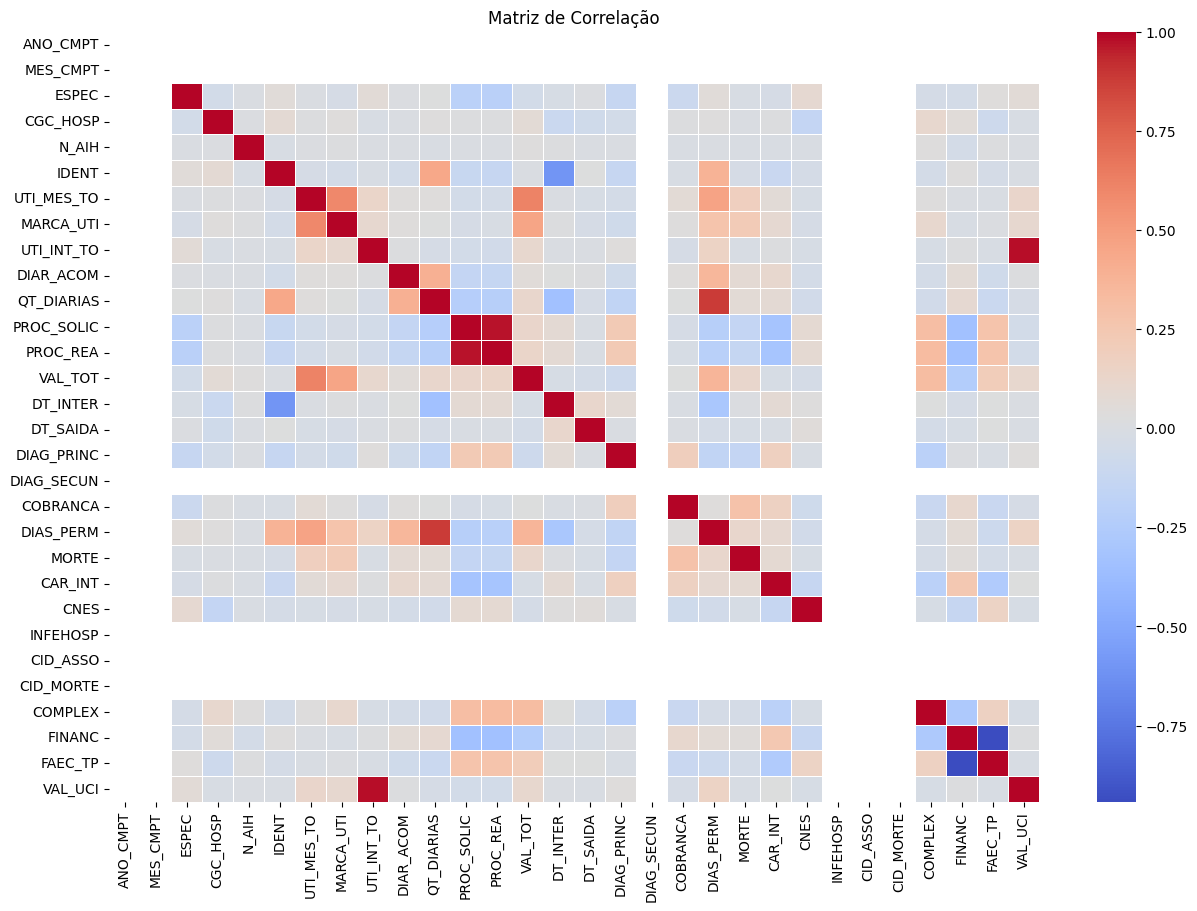

In [ ]:
correlation_matrix_internacao = df_internacao.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix_internacao, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

<ipython-input-32-af6cdc3361a9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val_tot_corr_internacao.values, y=val_tot_corr_internacao.index, palette='coolwarm')


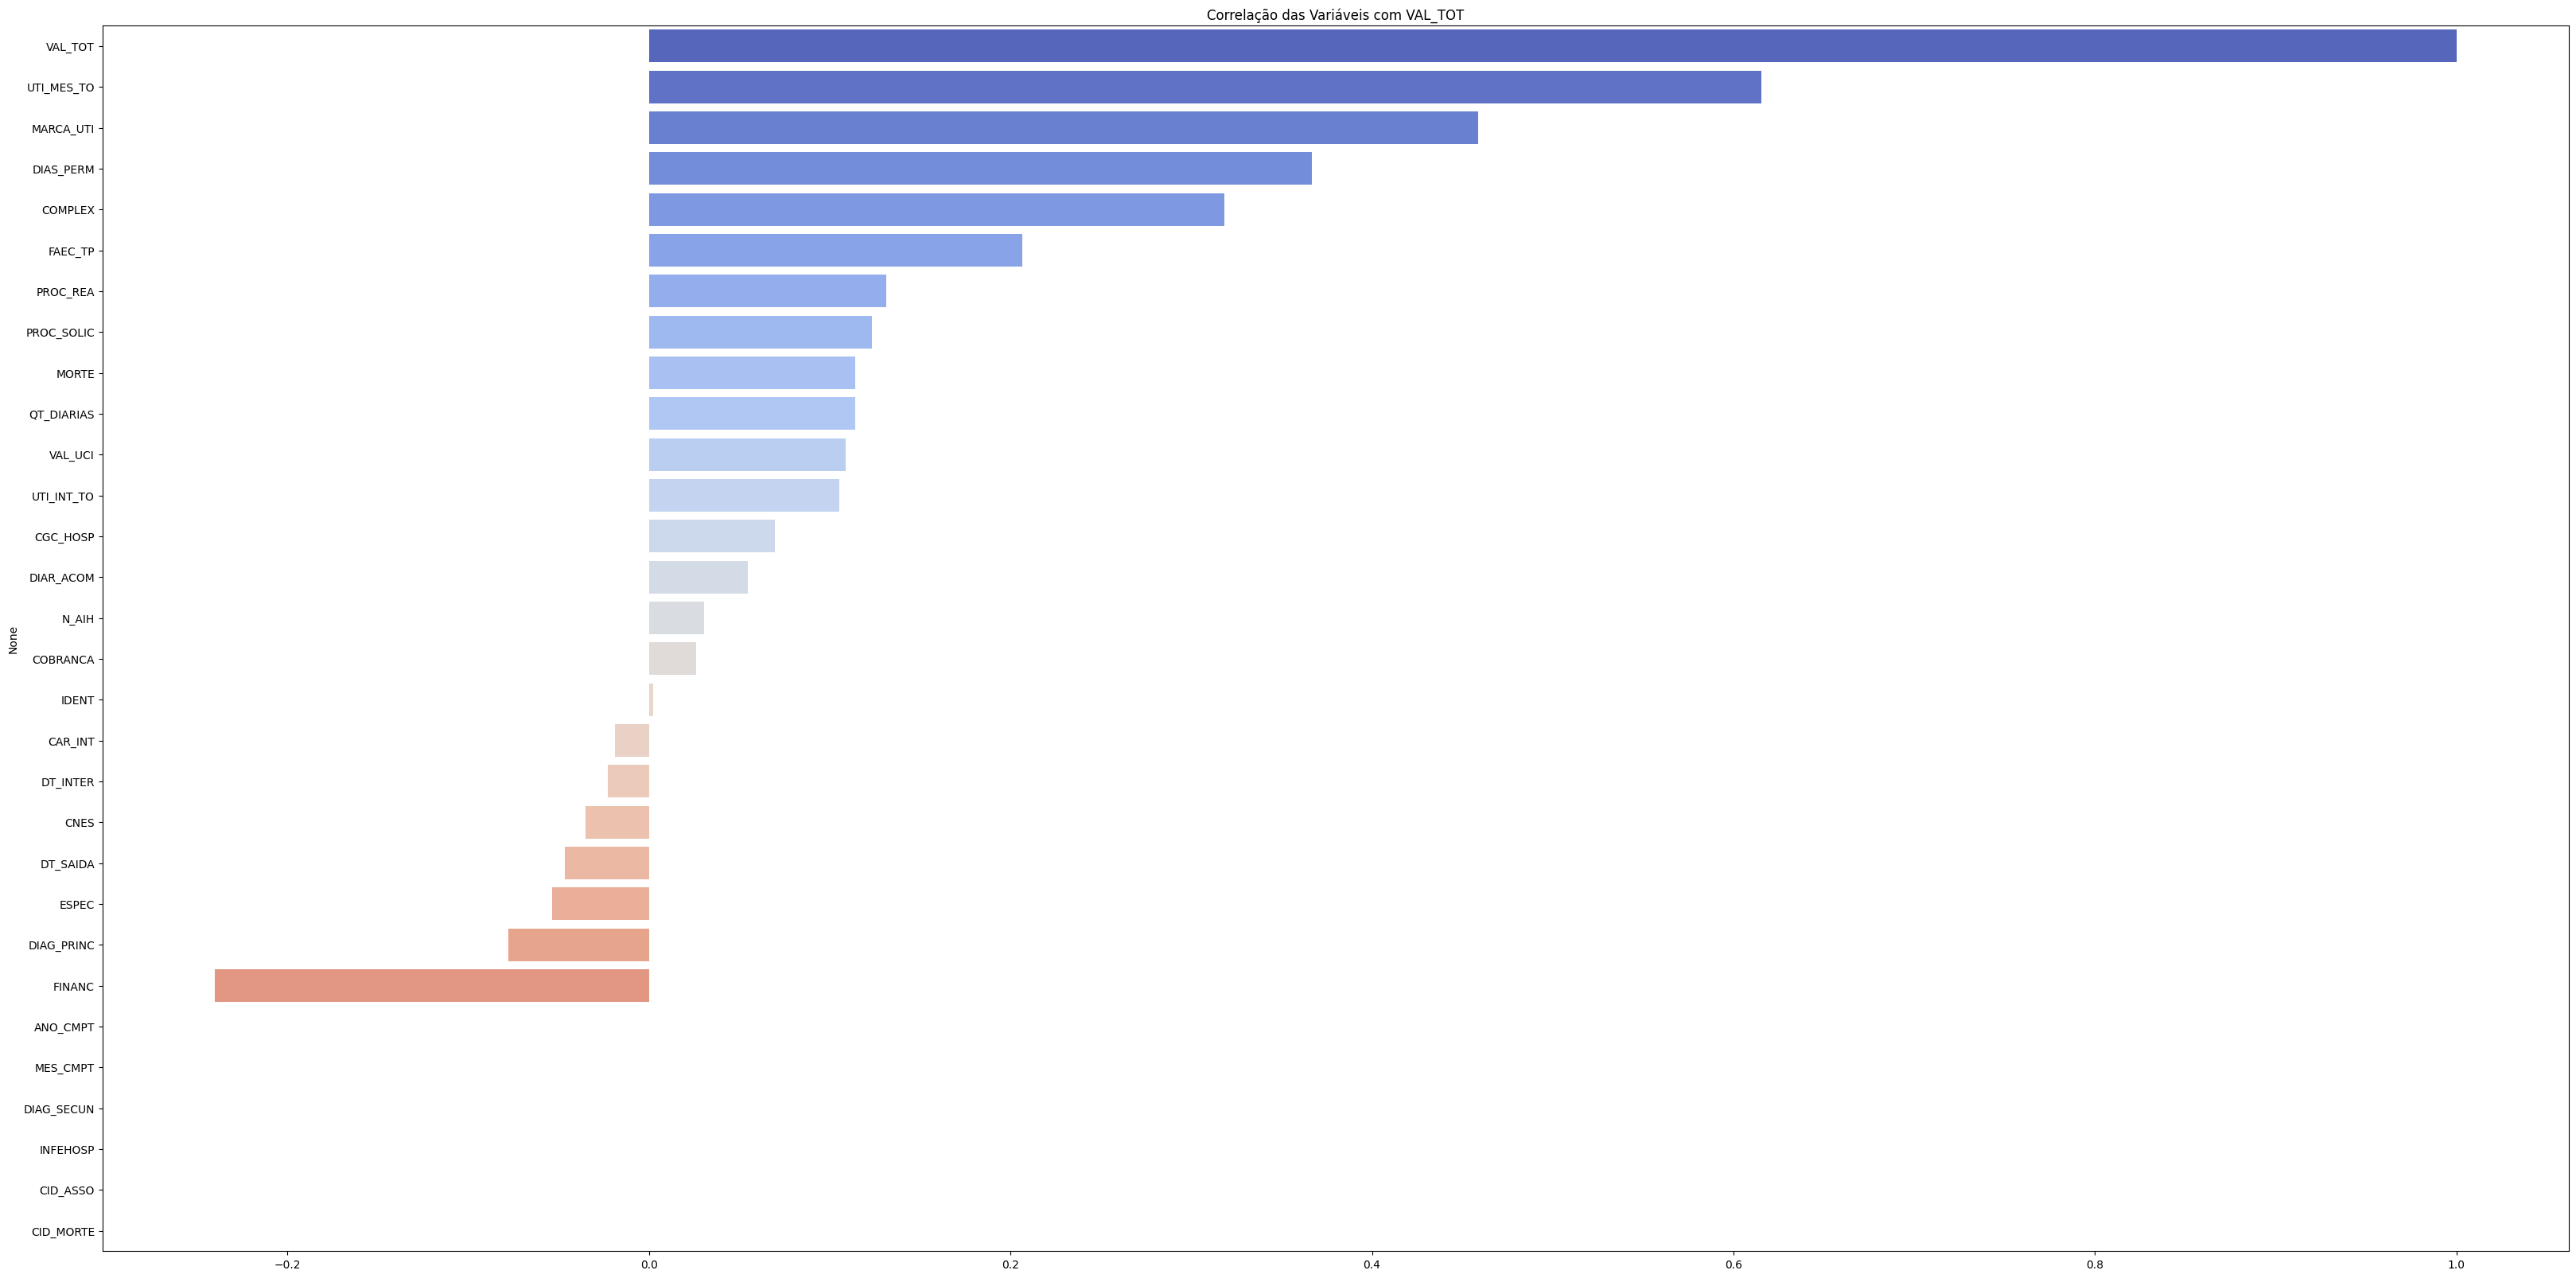

In [ ]:
plt.figure(figsize=(40, 20))
val_tot_corr_internacao = correlation_matrix_internacao['VAL_TOT'].sort_values(ascending=False)
sns.barplot(x=val_tot_corr_internacao.values, y=val_tot_corr_internacao.index, palette='coolwarm')
plt.title('Correlação das Variáveis com VAL_TOT')
plt.show()

In [ ]:
df_internacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241806 entries, 0 to 241805
Data columns (total 30 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ANO_CMPT    241806 non-null  int64  
 1   MES_CMPT    241806 non-null  int64  
 2   ESPEC       241806 non-null  int64  
 3   CGC_HOSP    241806 non-null  int64  
 4   N_AIH       241806 non-null  int64  
 5   IDENT       241806 non-null  int64  
 6   UTI_MES_TO  241806 non-null  int64  
 7   MARCA_UTI   241806 non-null  int64  
 8   UTI_INT_TO  241806 non-null  int64  
 9   DIAR_ACOM   241806 non-null  int64  
 10  QT_DIARIAS  241806 non-null  int64  
 11  PROC_SOLIC  241806 non-null  int64  
 12  PROC_REA    241806 non-null  int64  
 13  VAL_TOT     241806 non-null  float64
 14  DT_INTER    241806 non-null  int64  
 15  DT_SAIDA    241806 non-null  int64  
 16  DIAG_PRINC  241806 non-null  int64  
 17  DIAG_SECUN  241806 non-null  int64  
 18  COBRANCA    241806 non-null  int64  
 19  DI

In [ ]:
df_internacao.describe()

ANO_CMPT  MES_CMPT          ESPEC       CGC_HOSP         N_AIH  \
count  241806.0  241806.0  241806.000000  241806.000000  2.418060e+05   
mean     2024.0       3.0       3.085825     211.013469  3.524662e+12   
std         0.0       0.0       3.885841     153.545421  6.508422e+10   
min      2024.0       3.0       1.000000       0.000000  3.508100e+12   
25%      2024.0       3.0       1.000000      93.000000  3.524103e+12   
50%      2024.0       3.0       3.000000     190.000000  3.524107e+12   
75%      2024.0       3.0       3.000000     357.000000  3.524111e+12   
max      2024.0       3.0      87.000000     494.000000  9.924300e+12   

               IDENT     UTI_MES_TO      MARCA_UTI     UTI_INT_TO  \
count  241806.000000  241806.000000  241806.000000  241806.000000   
mean        1.075317       0.684177       7.790518       0.062798   
std         0.543686       3.371843      23.111382       0.948820   
min         1.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       0.000000       0.000000   
max         5.000000     212.000000      99.000000      53.000000   

           DIAR_ACOM     QT_DIARIAS    PROC_SOLIC      PROC_REA  \
count  241806.000000  241806.000000  2.418060e+05  2.418060e+05   
mean        1.382191       4.522655  3.514102e+08  3.520551e+08   
std         3.755015       6.932335  5.458797e+07  5.471496e+07   
min         0.000000       0.000000  2.010100e+08  2.010100e+08   
25%         0.000000       1.000000  3.030901e+08  3.030801e+08   
50%         0.000000       2.000000  3.100100e+08  3.100100e+08   
75%         1.000000       5.000000  4.080505e+08  4.080505e+08   
max       113.000000     194.000000  5.060201e+08  5.060201e+08   

             VAL_TOT      DT_INTER      DT_SAIDA     DIAG_PRINC  DIAG_SECUN  \
count  241806.000000  2.418060e+05  2.418060e+05  241806.000000    241806.0   
mean     1778.416638  2.023904e+07  2.024005e+07    2825.603868         0.0   
std      4672.440800  1.102219e+04  1.465172e+03    1496.135061         0.0   
min         0.000000  2.008010e+07  2.023100e+07       0.000000         0.0   
25%       356.810000  2.024023e+07  2.024030e+07    1832.000000         0.0   
50%       675.940000  2.024031e+07  2.024031e+07    2772.000000         0.0   
75%      1264.080000  2.024032e+07  2.024032e+07    3995.000000         0.0   
max    213315.770000  2.024033e+07  2.024033e+07    5627.000000         0.0   

            COBRANCA      DIAS_PERM          MORTE        CAR_INT  \
count  241806.000000  241806.000000  241806.000000  241806.000000   
mean       21.143036       5.118037       0.050578       1.733667   
std        16.234809       7.941201       0.219134       0.632171   
min        11.000000       0.000000       0.000000       1.000000   
25%        12.000000       1.000000       0.000000       1.000000   
50%        12.000000       2.000000       0.000000       2.000000   
75%        22.000000       6.000000       0.000000       2.000000   
max        67.000000     212.000000       1.000000       6.000000   

               CNES  INFEHOSP  CID_ASSO  CID_MORTE        COMPLEX  \
count  2.418060e+05  241806.0  241806.0   241806.0  241806.000000   
mean   2.792948e+06       0.0       0.0        0.0       2.094654   
std    1.786415e+06       0.0       0.0        0.0       0.292738   
min    8.028000e+03       0.0       0.0        0.0       2.000000   
25%    2.078473e+06       0.0       0.0        0.0       2.000000   
50%    2.082810e+06       0.0       0.0        0.0       2.000000   
75%    2.755130e+06       0.0       0.0        0.0       2.000000   
max    9.950931e+06       0.0       0.0        0.0       3.000000   

              FINANC        FAEC_TP        VAL_UCI  
count  241806.000000  241806.000000  241806.000000  
mean        5.870987       0.551529      12.509764  
std     

Para verificar se existem outliers e se podemos trabalhar com eles foi feito um código para plotar os gráficos de barra.

n_rows = (n_cols // 3) + (1 if n_cols % 3 else 0): Cálculo dinâmico de linhas para 3 colunas por linha

figsize=(15, 5 * n_rows): O tamanho da figura aumenta com o número de linhas

Subplot flexível:

plt.subplot(n_rows, 3, i) - agora aceita qualquer número de colunas

tight_layout(): Evita sobreposição

pad=10: Para melhor espaçamento nos títulos

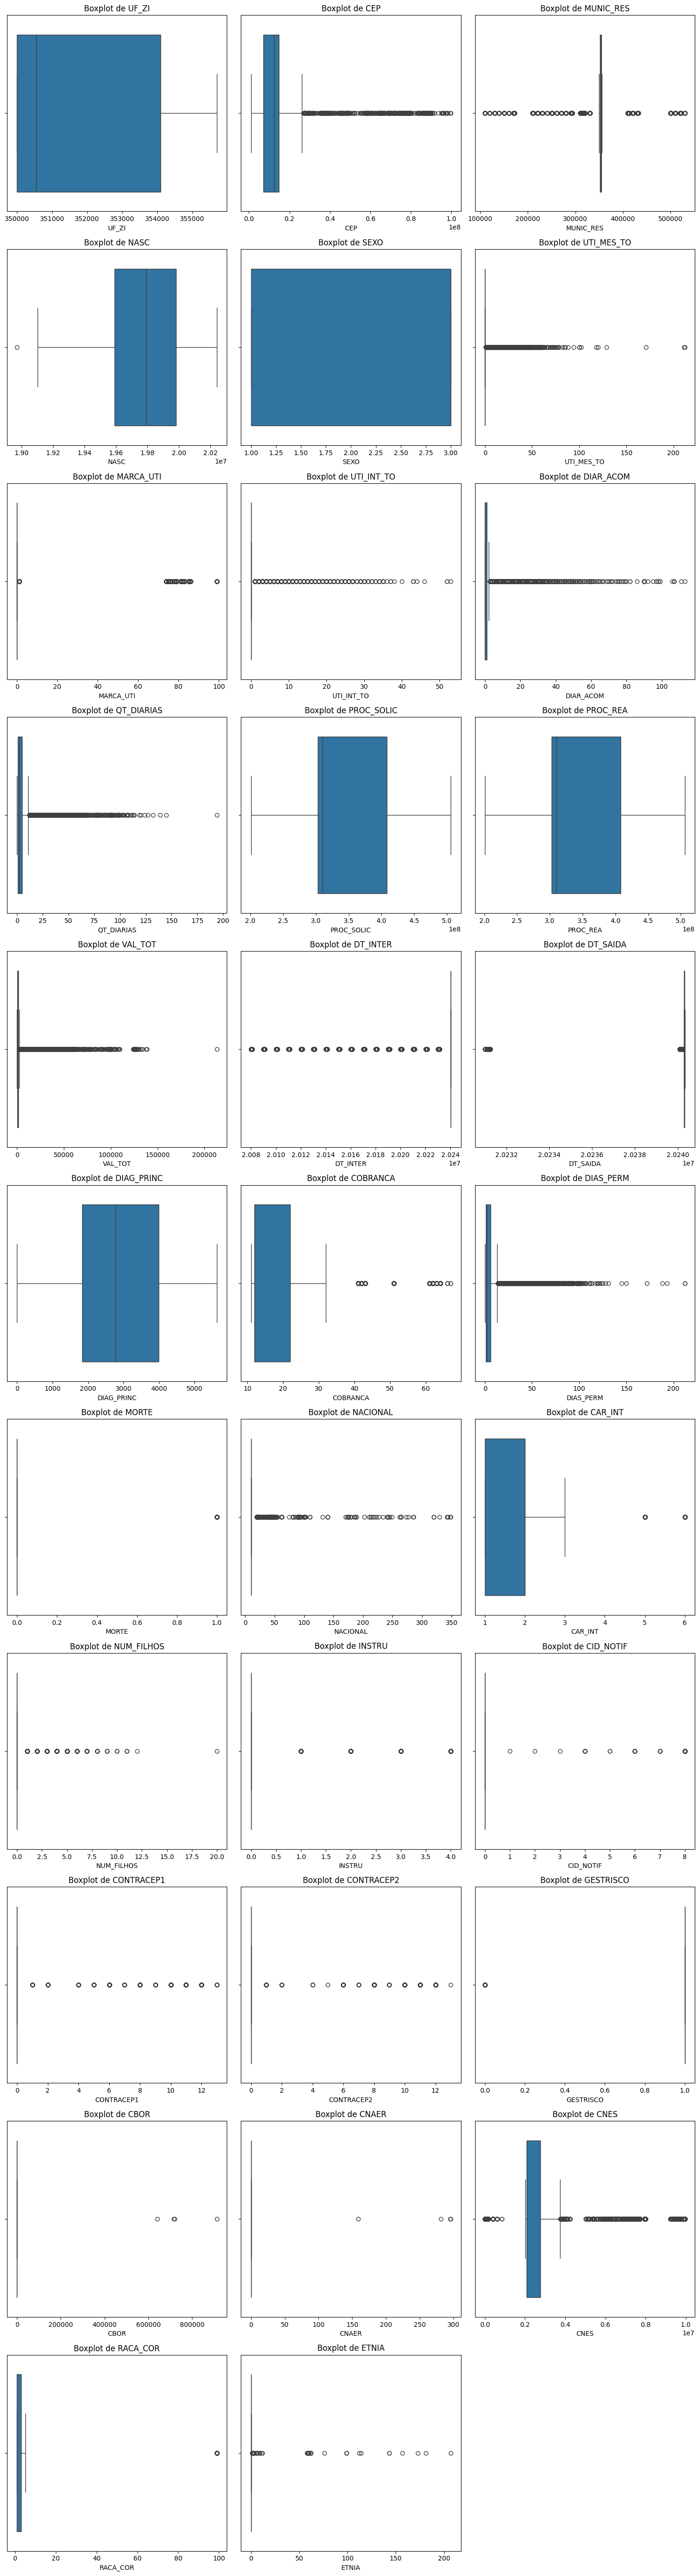

In [ ]:
numeric_cols = df_internacao.select_dtypes(include=['number']).columns
n_cols = len(numeric_cols)
n_rows = (n_cols // 3) + (1 if n_cols % 3 else 0)
plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(df_internacao.select_dtypes(include=['number']).columns, 1):
    plt.subplot(n_rows, 3, i)
    sns.boxplot(x=df_internacao[col])
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()

plt.show()

Como existe uma variação muito grande preferimos manter os dados para não interferir de maneira errada no dataset.

> Adicionar aspas



##PCA após retirada das features relacionados ao paciente



###Padronização de dados

In [ ]:
df_internacao.head()

ANO_CMPT  MES_CMPT  ESPEC  CGC_HOSP          N_AIH  IDENT  UTI_MES_TO  \
0      2024         3      3       446  3524115831412      1           0   
1      2024         3      3       446  3524105805759      1           0   
2      2024         3      3       446  3524105805760      1           0   
3      2024         3      3       446  3524105805770      1           0   
4      2024         3      3       446  3524105805781      1           0   

   MARCA_UTI  UTI_INT_TO  DIAR_ACOM  QT_DIARIAS  PROC_SOLIC   PROC_REA  \
0          0           0          8           9   303060212  303060212   
1          0           0          0           5   303140151  303140151   
2          0           0         14          15   303010037  303010037   
3          0           0          0           5   303070129  303070129   
4          0           0          2           3   301060088  301060088   

   VAL_TOT  DT_INTER  DT_SAIDA  DIAG_PRINC  DIAG_SECUN  COBRANCA  DIAS_PERM  \
0  1090.22  20240321  20240329        2128           0        41          8   
1   718.83  20240304  20240309        2356           0        12          5   
2  1276.25  20240219  20240305         103           0        12         15   
3   308.33  20240303  20240307        2822           0        31          4   
4   337.48  20240229  20240303        4582           0        12          3   

   MORTE  CAR_INT     CNES  INFEHOSP  CID_ASSO  CID_MORTE  COMPLEX  FINANC  \
0      1        2  3139050         0         0          0        2       6   
1      0        2  3139050         0         0          0        2       6   
2      0        2  3139050         0         0          0        2       6   
3      0        2  3139050         0         0          0        2       6   
4      0        2  3139050         0         0          0        2       6   

   FAEC_TP  VAL_UCI  
0        0      0.0  
1        0      0.0  
2        0      0.0  
3        0      0.0  
4        0      0.0

Remove a coluna target para a realização da padronização

In [ ]:
df_internacao.shape

(241806, 30)

In [ ]:
df_x = df_internacao.drop('VAL_TOT', axis=1)
df_y = df_internacao['VAL_TOT']

Plota um gráfico de linha mostrando quantidade de variância explicada em função do número de componentes principais usados.

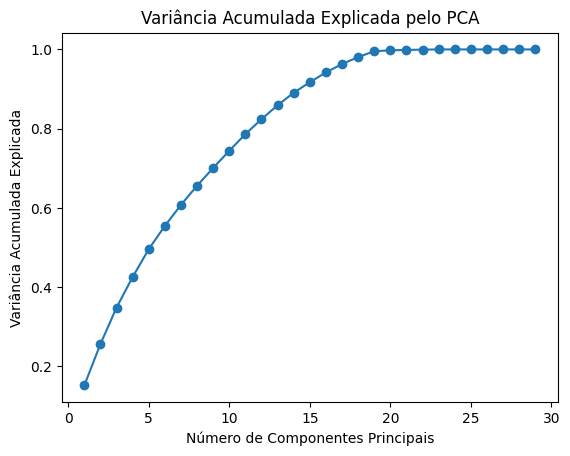

In [ ]:
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_x)

pca = PCA()
pca.fit(df_standardized)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Acumulada Explicada')
plt.title('Variância Acumulada Explicada pelo PCA')
plt.show()

Vamos definir uma porcentagem de **80%** de explicancia sobre os dados

In [ ]:
variace_threshold = 0.80

pca_number = np.argmax(cumulative_variance >= 0.80) + 1

print(f"Número de Componentes para {0.8 * 100}% da Variância: {pca_number}")

Número de Componentes para 80.0% da Variância: 12


###PCA

Aplica o PCA com o número calculado anteriormente e mostra a variancia para cada componente

In [ ]:
pca = PCA(n_components=pca_number)
main_components = pca.fit_transform(df_standardized)
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Variância explicada de cada componente:\n {explained_variance_ratio}")

Variância explicada de cada componente:
 [0.15173232 0.10440038 0.09208106 0.07717622 0.07029388 0.05873995
 0.05299517 0.04850045 0.04479824 0.04336941 0.04213466 0.03753156]


Cria a nomenclatura das colunas e salva em um DataFrame pca_df_removed

In [ ]:
components_num = main_components.shape[1]
column_names = [f'PC{i}' for i in range(1, components_num + 1)]
pca_df_internacao = pd.DataFrame(data=main_components, columns=column_names)
pca_df_internacao.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.287049 -0.293603 -0.003838  1.733943 -0.829236  0.516609 -0.421734   
1 -0.818319 -0.739210 -0.319654 -0.525378 -0.342728 -0.804429  0.128447   
2 -2.628554  0.793802 -0.872501 -0.048332 -0.834496  0.191455  2.928145   
3 -0.830060 -0.959446 -0.219089 -0.191138 -0.036639 -0.344323 -0.347239   
4 -0.594248 -1.123542 -0.092317 -0.415663  0.069698 -0.099866  0.082090   

        PC8       PC9      PC10      PC11      PC12  
0 -1.874250  3.043939  0.269217 -0.702544  1.001307  
1 -0.531975 -0.375543  0.056108  0.554332  0.620156  
2 -1.068594  0.584702 -0.184742  0.007455  0.743448  
3 -0.787683 -0.062623  0.139796  0.453490  0.893514  
4 -0.624372 -0.832091 -0.022275  0.570638  0.940778

Colocando a coluna target 'VAL_TOT' no final do dataframe

In [ ]:
pca_df_internacao = pd.concat([pca_df_internacao, df_y], axis=1)
pca_df_internacao.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.287049 -0.293603 -0.003838  1.733943 -0.829236  0.516609 -0.421734   
1 -0.818319 -0.739210 -0.319654 -0.525378 -0.342728 -0.804429  0.128447   
2 -2.628554  0.793802 -0.872501 -0.048332 -0.834496  0.191455  2.928145   
3 -0.830060 -0.959446 -0.219089 -0.191138 -0.036639 -0.344323 -0.347239   
4 -0.594248 -1.123542 -0.092317 -0.415663  0.069698 -0.099866  0.082090   

        PC8       PC9      PC10      PC11      PC12  VAL_TOT  
0 -1.874250  3.043939  0.269217 -0.702544  1.001307  1090.22  
1 -0.531975 -0.375543  0.056108  0.554332  0.620156   718.83  
2 -1.068594  0.584702 -0.184742  0.007455  0.743448  1276.25  
3 -0.787683 -0.062623  0.139796  0.453490  0.893514   308.33  
4 -0.624372 -0.832091 -0.022275  0.570638  0.940778   337.48

###Gráficos do PCA

Plotar os componentes vs. target pode mostrar se a projeção mantém informação relevante para a tarefa.

Segunda parte no código: Ajusta um polinômio de grau 1 (linha reta)

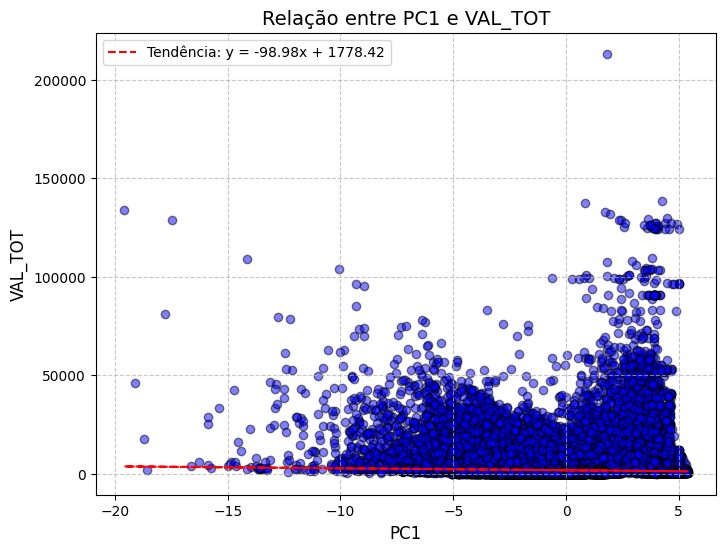

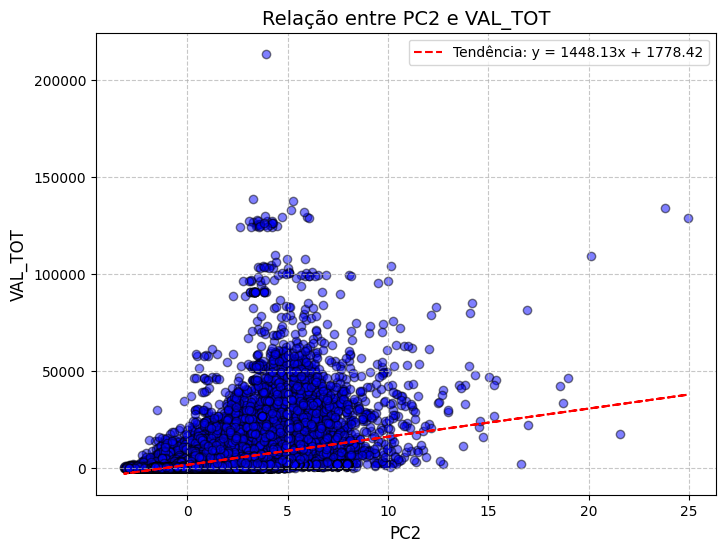

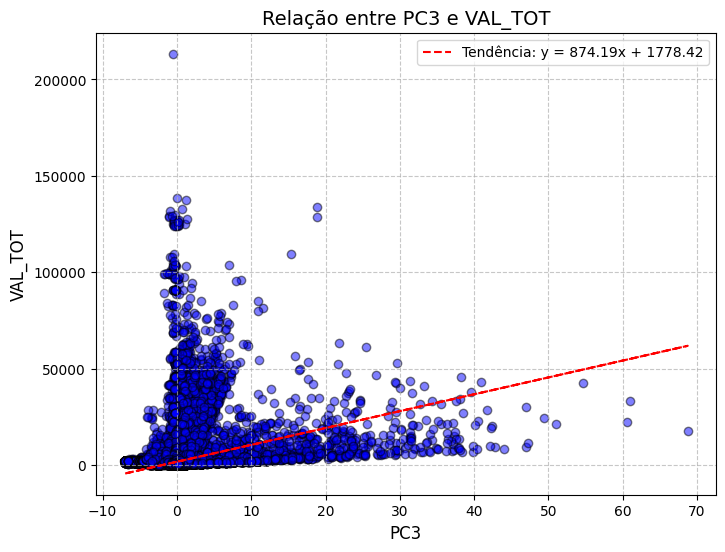

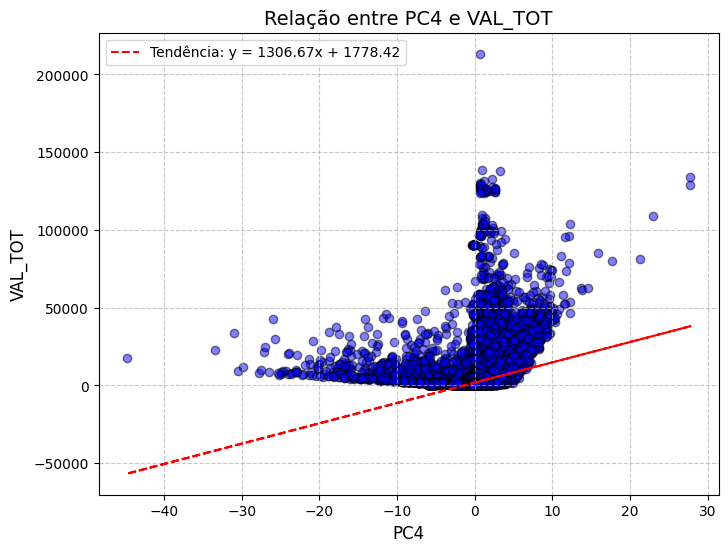

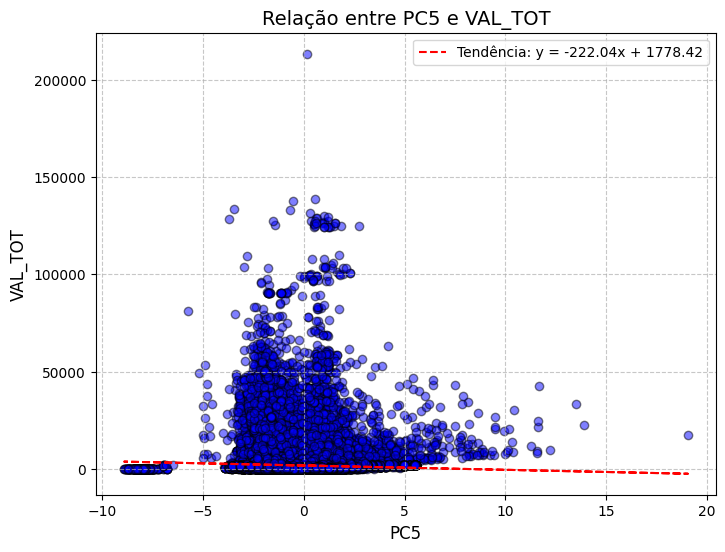

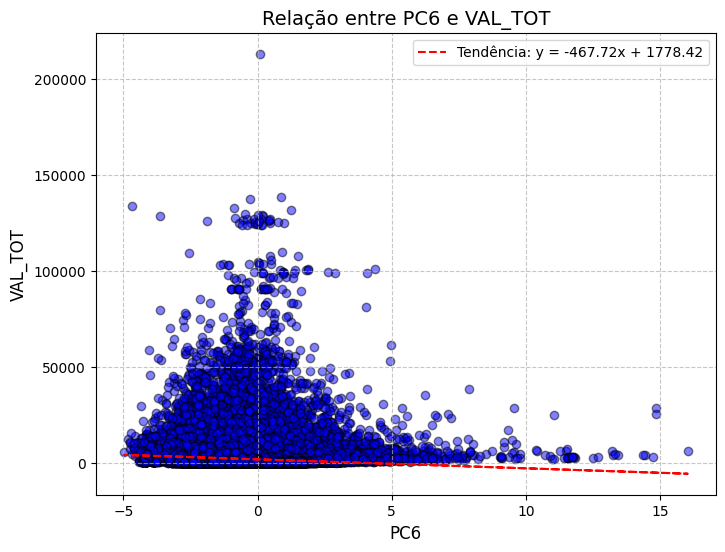

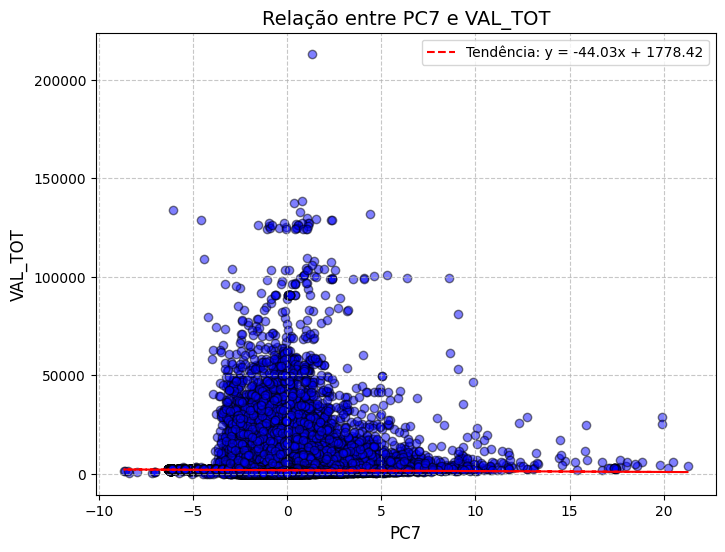

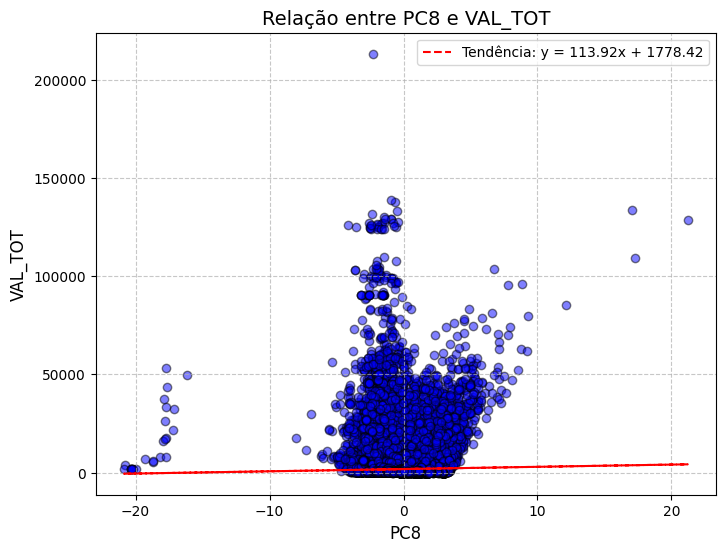

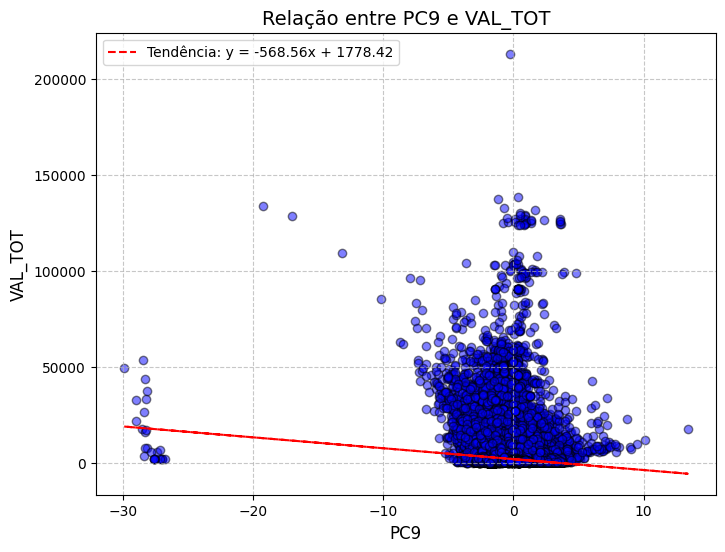

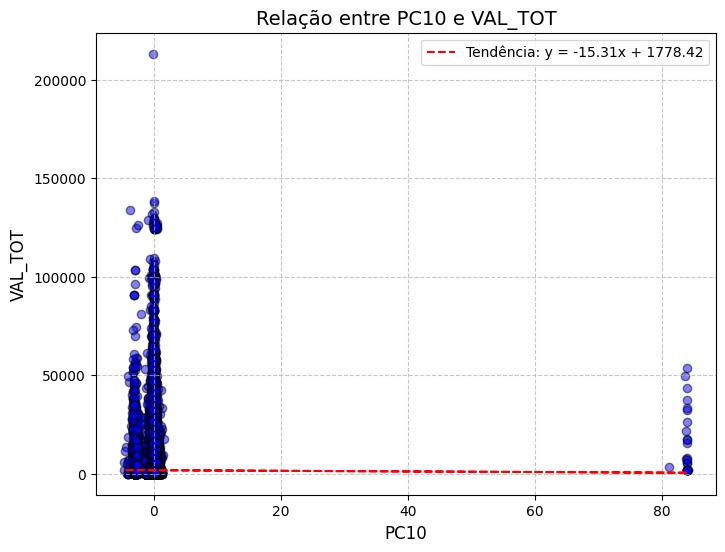

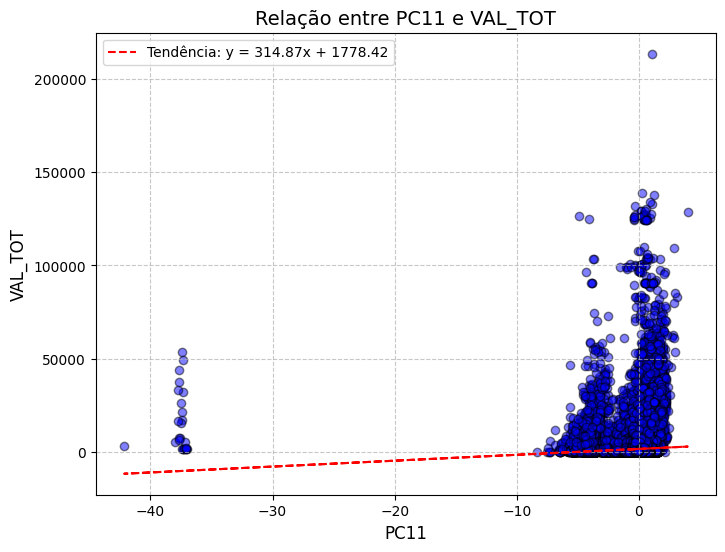

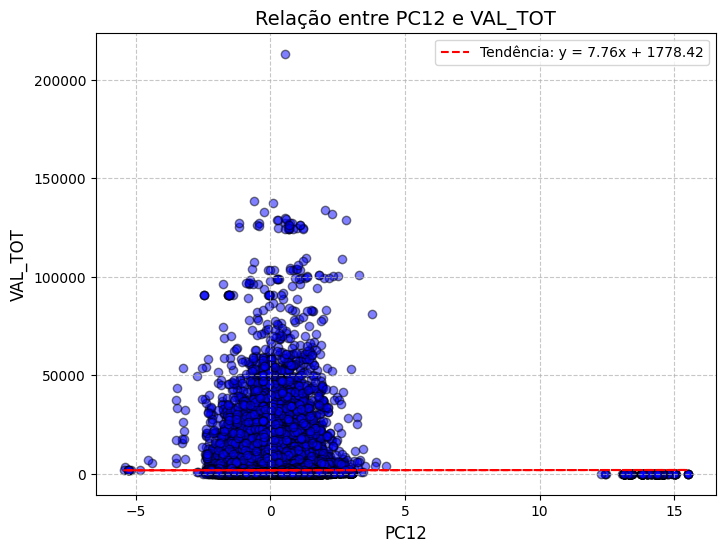

In [ ]:
target = 'VAL_TOT'

for col in pca_df_internacao.columns:
  if col == target:
    continue
  plt.figure(figsize=(8, 6))
  plt.scatter(x=pca_df_internacao[col], y=df_y, alpha=0.5, color='blue', edgecolors='k')
  plt.title(f"Relação entre {col} e VAL_TOT", fontsize=14)
  plt.xlabel(f"{col}", fontsize=12)
  plt.ylabel("VAL_TOT", fontsize=12)
  plt.grid(True, linestyle='--', alpha=0.7)

  z = np.polyfit(pca_df_internacao[col], df_y, 1)
  p = np.poly1d(z)
  plt.plot(pca_df_internacao[col], p(pca_df_internacao[col]), color='red', linestyle='--', label=f'Tendência: y = {z[0]:.2f}x + {z[1]:.2f}')
  plt.legend()
  plt.show()

In [ ]:
pca_df_internacao.to_csv('/content/drive/My Drive/Colab Notebooks/sp_1232024_pca_internacao.csv', index=False)

In [ ]:
pca_df_internacao.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.287049 -0.293603 -0.003838  1.733943 -0.829236  0.516609 -0.421734   
1 -0.818319 -0.739210 -0.319654 -0.525378 -0.342728 -0.804429  0.128447   
2 -2.628554  0.793802 -0.872501 -0.048332 -0.834496  0.191455  2.928145   
3 -0.830060 -0.959446 -0.219089 -0.191138 -0.036639 -0.344323 -0.347239   
4 -0.594248 -1.123542 -0.092317 -0.415663  0.069698 -0.099866  0.082090   

        PC8       PC9      PC10      PC11      PC12  VAL_TOT  
0 -1.874250  3.043939  0.269217 -0.702544  1.001307  1090.22  
1 -0.531975 -0.375543  0.056108  0.554332  0.620156   718.83  
2 -1.068594  0.584702 -0.184742  0.007455  0.743448  1276.25  
3 -0.787683 -0.062623  0.139796  0.453490  0.893514   308.33  
4 -0.624372 -0.832091 -0.022275  0.570638  0.940778   337.48